# Cervical Cancer Risk Classification using XGBoost

- Build and train and XGBoost model to predict cervical cancer in 858 patients.
- Dataset collected at *Hospotal Universitario de Caracas* available on Kaggle [here](https://www.kaggle.com/datasets/loveall/cervical-cancer-risk-classification)



# Exploratory Data Analysis

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import zipfile

!pip install plotly
import plotly.express as px
from jupyterthemes import jtplot
jtplot.style(theme = 'monokai', context = 'notebook', ticks = True, grid = False) 


[notice] A new release of pip is available: 24.0 -> 24.2
[notice] To update, run: pip install --upgrade pip


## Dataset Glossary

### Features
- **(int)** Age
- **(int)** Number of sexual partners
- **(int)** First sexual intercourse (age)
- **(int)** Number of pregnancies
- **(bool)** Smokes
- **(int)** Smokes (years)
- **(int)** Smokes (packs/year)
- **(bool)** Hormonal Contraceptives
- **(int)** Hormonal Contraceptives (years)
- **(bool)** IUD (Intrauterine device, used for birth control)
- **(int)** IUD (years)
- **(bool)** STDs (Sexually transmitted diseases)
- **(int)** STDs (number)
- **(bool)** STDs: Condylomatosis
- **(bool)** STDs: Cervical condylomatosis
- **(bool)** STDs: Vaginal condylomatosis
- **(bool)** STDs: Vulvo-perineal condylomatosis
- **(bool)** STDs: Syphilis
- **(bool)** STDs: Pelvic inflammatory disease
- **(bool)** STDs: Genital herpes
- **(bool)** STDs: Molluscum contagiosum
- **(bool)** STDs: AIDS
- **(bool)** STDs: HIV
- **(bool)** STDs: Hepatitis B
- **(bool)** STDs: HPV
- **(int)** STDs: Number of diagnoses
- **(int)** STDs: Time since first diagnosis
- **(int)** STDs: Time since last diagnosis
- **(bool)** Dx: Cancer
- **(bool)** Dx: CIN (Cervical Intraepithelial Neoplasia)
- **(bool)** Dx: HPV
- **(bool)** Dx (General diagnosis)
  
### Target Variables
- **(bool)** Hinselmann: Target variable - A colposcopy is a procedure in which doctors examine the cervix.
- **(bool)** Schiller: Target variable - Schiller's Iodine test is used for cervical cancer diagnosis.
- **(bool)** Cytology: Target variable - Cytology is the exam of a single cell type used for cancer screening.
- **(bool)** Biopsy: Target variable - Biopsy is performed by removing a piece of tissue and examining it under a microscope. Biopsy is the main way doctors diagnose most types of cancer.

In [2]:
df = pd.read_csv("cervical_cancer.csv")
df.head()

Age Number of sexual partners First sexual intercourse Num of pregnancies  \
0   18                       4.0                     15.0                1.0   
1   15                       1.0                     14.0                1.0   
2   34                       1.0                        ?                1.0   
3   52                       5.0                     16.0                4.0   
4   46                       3.0                     21.0                4.0   

  Smokes Smokes (years) Smokes (packs/year) Hormonal Contraceptives  \
0    0.0            0.0                 0.0                     0.0   
1    0.0            0.0                 0.0                     0.0   
2    0.0            0.0                 0.0                     0.0   
3    1.0           37.0                37.0                     1.0   
4    0.0            0.0                 0.0                     1.0   

  Hormonal Contraceptives (years)  IUD  ... STDs: Time since first diagnosis  \
0                             0.0  0.0  ...                                ?   
1                             0.0  0.0  ...                                ?   
2                             0.0  0.0  ...                                ?   
3                             3.0  0.0  ...                                ?   
4                            15.0  0.0  ...                                ?   

  STDs: Time since last diagnosis Dx:Cancer Dx:CIN Dx:HPV Dx Hinselmann  \
0                               ?         0      0      0  0          0   
1                               ?         0      0      0  0          0   
2                               ?         0      0      0  0          0   
3                               ?         1      0      1  0          0   
4                               ?         0      0      0  0          0   

  Schiller Citology Biopsy  
0        0        0      0  
1        0        0      0  
2        0        0      0  
3        0        0      0  
4        0        0      0  

[5 rows x 36 columns]

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 858 entries, 0 to 857
Data columns (total 36 columns):
 #   Column                              Non-Null Count  Dtype 
---  ------                              --------------  ----- 
 0   Age                                 858 non-null    int64 
 1   Number of sexual partners           858 non-null    object
 2   First sexual intercourse            858 non-null    object
 3   Num of pregnancies                  858 non-null    object
 4   Smokes                              858 non-null    object
 5   Smokes (years)                      858 non-null    object
 6   Smokes (packs/year)                 858 non-null    object
 7   Hormonal Contraceptives             858 non-null    object
 8   Hormonal Contraceptives (years)     858 non-null    object
 9   IUD                                 858 non-null    object
 10  IUD (years)                         858 non-null    object
 11  STDs                                858 non-null    object

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 858 entries, 0 to 857
Data columns (total 36 columns):
 #   Column                              Non-Null Count  Dtype 
---  ------                              --------------  ----- 
 0   Age                                 858 non-null    int64 
 1   Number of sexual partners           858 non-null    object
 2   First sexual intercourse            858 non-null    object
 3   Num of pregnancies                  858 non-null    object
 4   Smokes                              858 non-null    object
 5   Smokes (years)                      858 non-null    object
 6   Smokes (packs/year)                 858 non-null    object
 7   Hormonal Contraceptives             858 non-null    object
 8   Hormonal Contraceptives (years)     858 non-null    object
 9   IUD                                 858 non-null    object
 10  IUD (years)                         858 non-null    object
 11  STDs                                858 non-null    object

In [5]:
# Replace '?' with NaN 
df = df.replace("?", np.nan)
df

Age Number of sexual partners First sexual intercourse  \
0     18                       4.0                     15.0   
1     15                       1.0                     14.0   
2     34                       1.0                      NaN   
3     52                       5.0                     16.0   
4     46                       3.0                     21.0   
..   ...                       ...                      ...   
853   34                       3.0                     18.0   
854   32                       2.0                     19.0   
855   25                       2.0                     17.0   
856   33                       2.0                     24.0   
857   29                       2.0                     20.0   

    Num of pregnancies Smokes Smokes (years) Smokes (packs/year)  \
0                  1.0    0.0            0.0                 0.0   
1                  1.0    0.0            0.0                 0.0   
2                  1.0    0.0            0.0                 0.0   
3                  4.0    1.0           37.0                37.0   
4                  4.0    0.0            0.0                 0.0   
..                 ...    ...            ...                 ...   
853                0.0    0.0            0.0                 0.0   
854                1.0    0.0            0.0                 0.0   
855                0.0    0.0            0.0                 0.0   
856                2.0    0.0            0.0                 0.0   
857                1.0    0.0            0.0                 0.0   

    Hormonal Contraceptives Hormonal Contraceptives (years)  IUD  ...  \
0                       0.0                             0.0  0.0  ...   
1                       0.0                             0.0  0.0  ...   
2                       0.0                             0.0  0.0  ...   
3                       1.0                             3.0  0.0  ...   
4                       1.0                            15.0  0.0  ...   
..                      ...                             ...  ...  ...   
853                     0.0                             0.0  0.0  ...   
854                     1.0                             8.0  0.0  ...   
855                     1.0                            0.08  0.0  ...   
856                     1.0                            0.08  0.0  ...   
857                     1.0                             0.5  0.0  ...   

    STDs: Time since first diagnosis STDs: Time since last diagnosis  \
0                                NaN                             NaN   
1                                NaN                             NaN   
2                                NaN                             NaN   
3                                NaN                             NaN   
4                                NaN                             NaN   
..                               ...                             ...   
853                              NaN                             NaN   
854                              NaN                             NaN   
855                              NaN                             NaN   
856                              NaN                             NaN   
857                              NaN                             NaN   

    Dx:Cancer Dx:CIN Dx:HPV Dx Hinselmann Schiller Citology Biopsy  
0           0      0      0  0          0        0        0      0  
1           0      0      0  0          0        0        0      0  
2           0      0      0  0          0        0        0      0  
3           1      0      1  0          0        0        0      0  
4           0      0      0  0          0        0        0      0  
..        ...    ...    ... ..        ...      ...      ...    ...  
853         0      0      0  0          0        0        0      0  
854         0      0      0  0          0        0        0      0  
855         0      0      0  0          0        0        1      0  

In [6]:
df = df.apply(pd.to_numeric)

Text(0.5, 1.0, 'Missing Values Heatmap')

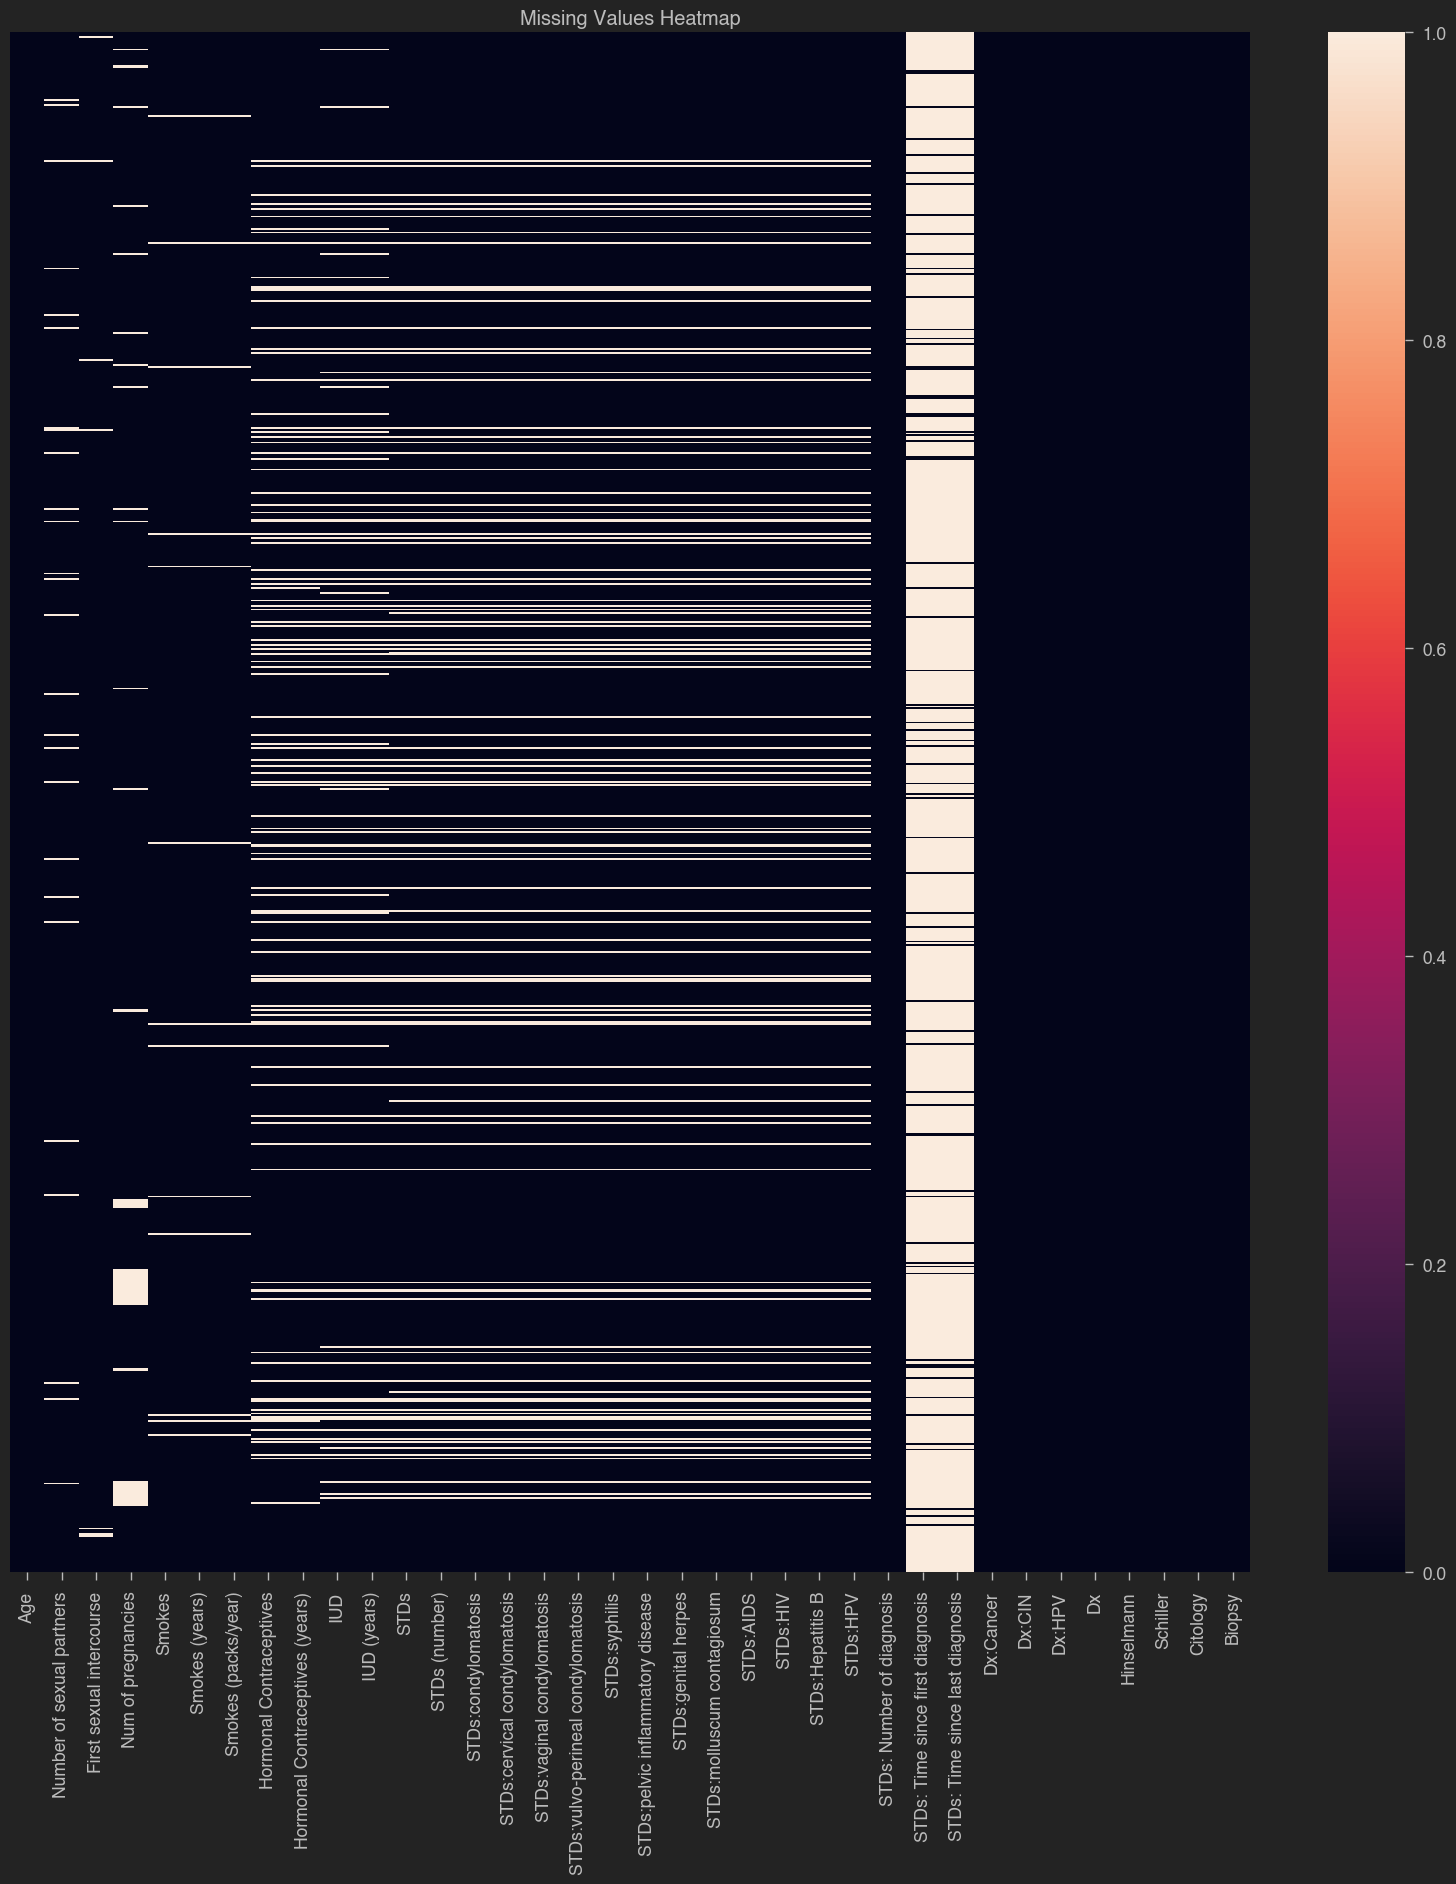

In [7]:
# Plot heatmap to visualize missing values
plt.figure(figsize=(20,20))
sns.heatmap(df.isnull(), yticklabels = False)
plt.title('Missing Values Heatmap')

In [8]:
# Drop Since STDs: Time since first diagnosis and STDs: Time since last diagnosis (too many missing values) 
df = df.drop(columns=["STDs: Time since first diagnosis", "STDs: Time since last diagnosis"])

In [9]:
df.describe()

Age  Number of sexual partners  First sexual intercourse  \
count  858.000000                 832.000000                851.000000   
mean    26.820513                   2.527644                 16.995300   
std      8.497948                   1.667760                  2.803355   
min     13.000000                   1.000000                 10.000000   
25%     20.000000                   2.000000                 15.000000   
50%     25.000000                   2.000000                 17.000000   
75%     32.000000                   3.000000                 18.000000   
max     84.000000                  28.000000                 32.000000   

       Num of pregnancies      Smokes  Smokes (years)  Smokes (packs/year)  \
count          802.000000  845.000000      845.000000           845.000000   
mean             2.275561    0.145562        1.219721             0.453144   
std              1.447414    0.352876        4.089017             2.226610   
min              0.000000    0.000000        0.000000             0.000000   
25%              1.000000    0.000000        0.000000             0.000000   
50%              2.000000    0.000000        0.000000             0.000000   
75%              3.000000    0.000000        0.000000             0.000000   
max             11.000000    1.000000       37.000000            37.000000   

       Hormonal Contraceptives  Hormonal Contraceptives (years)         IUD  \
count               750.000000                       750.000000  741.000000   
mean                  0.641333                         2.256419    0.112011   
std                   0.479929                         3.764254    0.315593   
min                   0.000000                         0.000000    0.000000   
25%                   0.000000                         0.000000    0.000000   
50%                   1.000000                         0.500000    0.000000   
75%                   1.000000                         3.000000    0.000000   
max                   1.000000                        30.000000    1.000000   

       ...    STDs:HPV  STDs: Number of diagnosis   Dx:Cancer      Dx:CIN  \
count  ...  753.000000                 858.000000  858.000000  858.000000   
mean   ...    0.002656                   0.087413    0.020979    0.010490   
std    ...    0.051503                   0.302545    0.143398    0.101939   
min    ...    0.000000                   0.000000    0.000000    0.000000   
25%    ...    0.000000                   0.000000    0.000000    0.000000   
50%    ...    0.000000                   0.000000    0.000000    0.000000   
75%    ...    0.000000                   0.000000    0.000000    0.000000   
max    ...    1.000000                   3.000000    1.000000    1.000000   

           Dx:HPV          Dx  Hinselmann    Schiller    Citology      Biopsy  
count  858.000000  858.000000  858.000000  858.000000  858.000000  858.000000  
mean     0.020979    0.027972    0.040793    0.086247    0.051282    0.064103  
std      0.143398    0.164989    0.197925    0.280892    0.220701    0.245078  
min      0.000000    0.000000    0.000000    0.000000    0.000000    0.000000  
25%      0.000000    0.000000    0.000000    0.000000    0.000000    0.000000  
50%      0.000000    0.000000    0.000000    0.000000    0.000000    0.000000  
75%      0.000000    0.000000    0.000000    0.000000    0.000000    0.000000  
max      1.000000    1.000000    1.000000    1.000000    1.000000    1.000000  

[8 rows x 34 columns]

In [10]:
df.mean()

Age                                   26.820513
Number of sexual partners              2.527644
First sexual intercourse              16.995300
Num of pregnancies                     2.275561
Smokes                                 0.145562
Smokes (years)                         1.219721
Smokes (packs/year)                    0.453144
Hormonal Contraceptives                0.641333
Hormonal Contraceptives (years)        2.256419
IUD                                    0.112011
IUD (years)                            0.514804
STDs                                   0.104914
STDs (number)                          0.176627
STDs:condylomatosis                    0.058433
STDs:cervical condylomatosis           0.000000
STDs:vaginal condylomatosis            0.005312
STDs:vulvo-perineal condylomatosis     0.057105
STDs:syphilis                          0.023904
STDs:pelvic inflammatory disease       0.001328
STDs:genital herpes                    0.001328
STDs:molluscum contagiosum             0

In [11]:
# Replace missing values with mean
df = df.fillna(df.mean())
df

Age  Number of sexual partners  First sexual intercourse  \
0     18                        4.0                   15.0000   
1     15                        1.0                   14.0000   
2     34                        1.0                   16.9953   
3     52                        5.0                   16.0000   
4     46                        3.0                   21.0000   
..   ...                        ...                       ...   
853   34                        3.0                   18.0000   
854   32                        2.0                   19.0000   
855   25                        2.0                   17.0000   
856   33                        2.0                   24.0000   
857   29                        2.0                   20.0000   

     Num of pregnancies  Smokes  Smokes (years)  Smokes (packs/year)  \
0                   1.0     0.0             0.0                  0.0   
1                   1.0     0.0             0.0                  0.0   
2                   1.0     0.0             0.0                  0.0   
3                   4.0     1.0            37.0                 37.0   
4                   4.0     0.0             0.0                  0.0   
..                  ...     ...             ...                  ...   
853                 0.0     0.0             0.0                  0.0   
854                 1.0     0.0             0.0                  0.0   
855                 0.0     0.0             0.0                  0.0   
856                 2.0     0.0             0.0                  0.0   
857                 1.0     0.0             0.0                  0.0   

     Hormonal Contraceptives  Hormonal Contraceptives (years)  IUD  ...  \
0                        0.0                             0.00  0.0  ...   
1                        0.0                             0.00  0.0  ...   
2                        0.0                             0.00  0.0  ...   
3                        1.0                             3.00  0.0  ...   
4                        1.0                            15.00  0.0  ...   
..                       ...                              ...  ...  ...   
853                      0.0                             0.00  0.0  ...   
854                      1.0                             8.00  0.0  ...   
855                      1.0                             0.08  0.0  ...   
856                      1.0                             0.08  0.0  ...   
857                      1.0                             0.50  0.0  ...   

     STDs:HPV  STDs: Number of diagnosis  Dx:Cancer  Dx:CIN  Dx:HPV  Dx  \
0         0.0                          0          0       0       0   0   
1         0.0                          0          0       0       0   0   
2         0.0                          0          0       0       0   0   
3         0.0                          0          1       0       1   0   
4         0.0                          0          0       0       0   0   
..        ...                        ...        ...     ...     ...  ..   
853       0.0                          0          0       0       0   0   
854       0.0                          0          0       0       0   0   
855       0.0                          0          0       0       0   0   
856       0.0                          0          0       0       0   0   
857       0.0                          0          0       0       0   0   

     Hinselmann  Schiller  Citology  Biopsy  
0             0         0         0       0  
1             0         0         0       0  
2             0         0         0       0  
3             0         0         0       0  
4             0         0         0       0  
..          ...       ...       ...     ...  
853           0         0         0       0  
854           0         0         0       0  
855           0         0         1       0  
856           0         0         0       0  
857           0         0         0       0  

[858

In [12]:
corr_matrix = df.corr()
corr_matrix

Age  Number of sexual partners  \
Age                                 1.000000                   0.084896   
Number of sexual partners           0.084896                   1.000000   
First sexual intercourse            0.369168                  -0.147937   
Num of pregnancies                  0.526137                   0.076719   
Smokes                              0.055813                   0.238078   
Smokes (years)                      0.217349                   0.177117   
Smokes (packs/year)                 0.131180                   0.175153   
Hormonal Contraceptives             0.065624                   0.006342   
Hormonal Contraceptives (years)     0.277181                   0.018552   
IUD                                 0.267662                   0.030005   
IUD (years)                         0.205886                   0.004215   
STDs                                0.010017                   0.053754   
STDs (number)                      -0.015488                   0.039359   
STDs:condylomatosis                -0.025012                   0.034646   
STDs:cervical condylomatosis             NaN                        NaN   
STDs:vaginal condylomatosis         0.006220                  -0.042924   
STDs:vulvo-perineal condylomatosis -0.022614                   0.036750   
STDs:syphilis                       0.010442                   0.027178   
STDs:pelvic inflammatory disease    0.023216                   0.030616   
STDs:genital herpes                -0.029076                  -0.031826   
STDs:molluscum contagiosum         -0.000919                   0.030616   
STDs:AIDS                                NaN                        NaN   
STDs:HIV                           -0.002025                   0.019871   
STDs:Hepatitis B                   -0.029076                  -0.011012   
STDs:HPV                            0.038546                   0.013871   
STDs: Number of diagnosis          -0.001606                   0.051559   
Dx:Cancer                           0.110340                   0.022309   
Dx:CIN                              0.061443                   0.015691   
Dx:HPV                              0.101722                   0.027264   
Dx                                  0.092635                   0.022982   
Hinselmann                         -0.003967                  -0.039273   
Schiller                            0.103283                  -0.008899   
Citology                           -0.016862                   0.021839   
Biopsy                              0.055956                  -0.001429   

                                    First sexual intercourse  \
Age                                                 0.369168   
Number of sexual partners                          -0.147937   
First sexual intercourse                            1.000000   
Num of pregnancies                                 -0.058223   
Smokes                                             -0.123602   
Smokes (years)                                     -0.058366   
Smokes (packs/year)                                -0.056332   
Hormonal Contraceptives                             0.018344   
Hormonal Contraceptives (years)                     0.008000   
IUD                                                -0.020975   
IUD (years)                                        -0.024803   
STDs                                               -0.013133   
STDs (number)                                       0.006487   
STDs:condylomatosis                                 0.026777   
STDs:cervical condylomatosis                             NaN   
STDs:vaginal condylomatosis                         0.071425   
STDs:vulvo-perineal condylomatosis                  0.031082   
STDs:syphilis                                      -0.100999   
STDs:pelvic inflammatory disease                   -0.001089   
STDs:genital herpes                                 0.023398   
STDs:molluscum contagiosum                         -0.013332   
STDs:AI

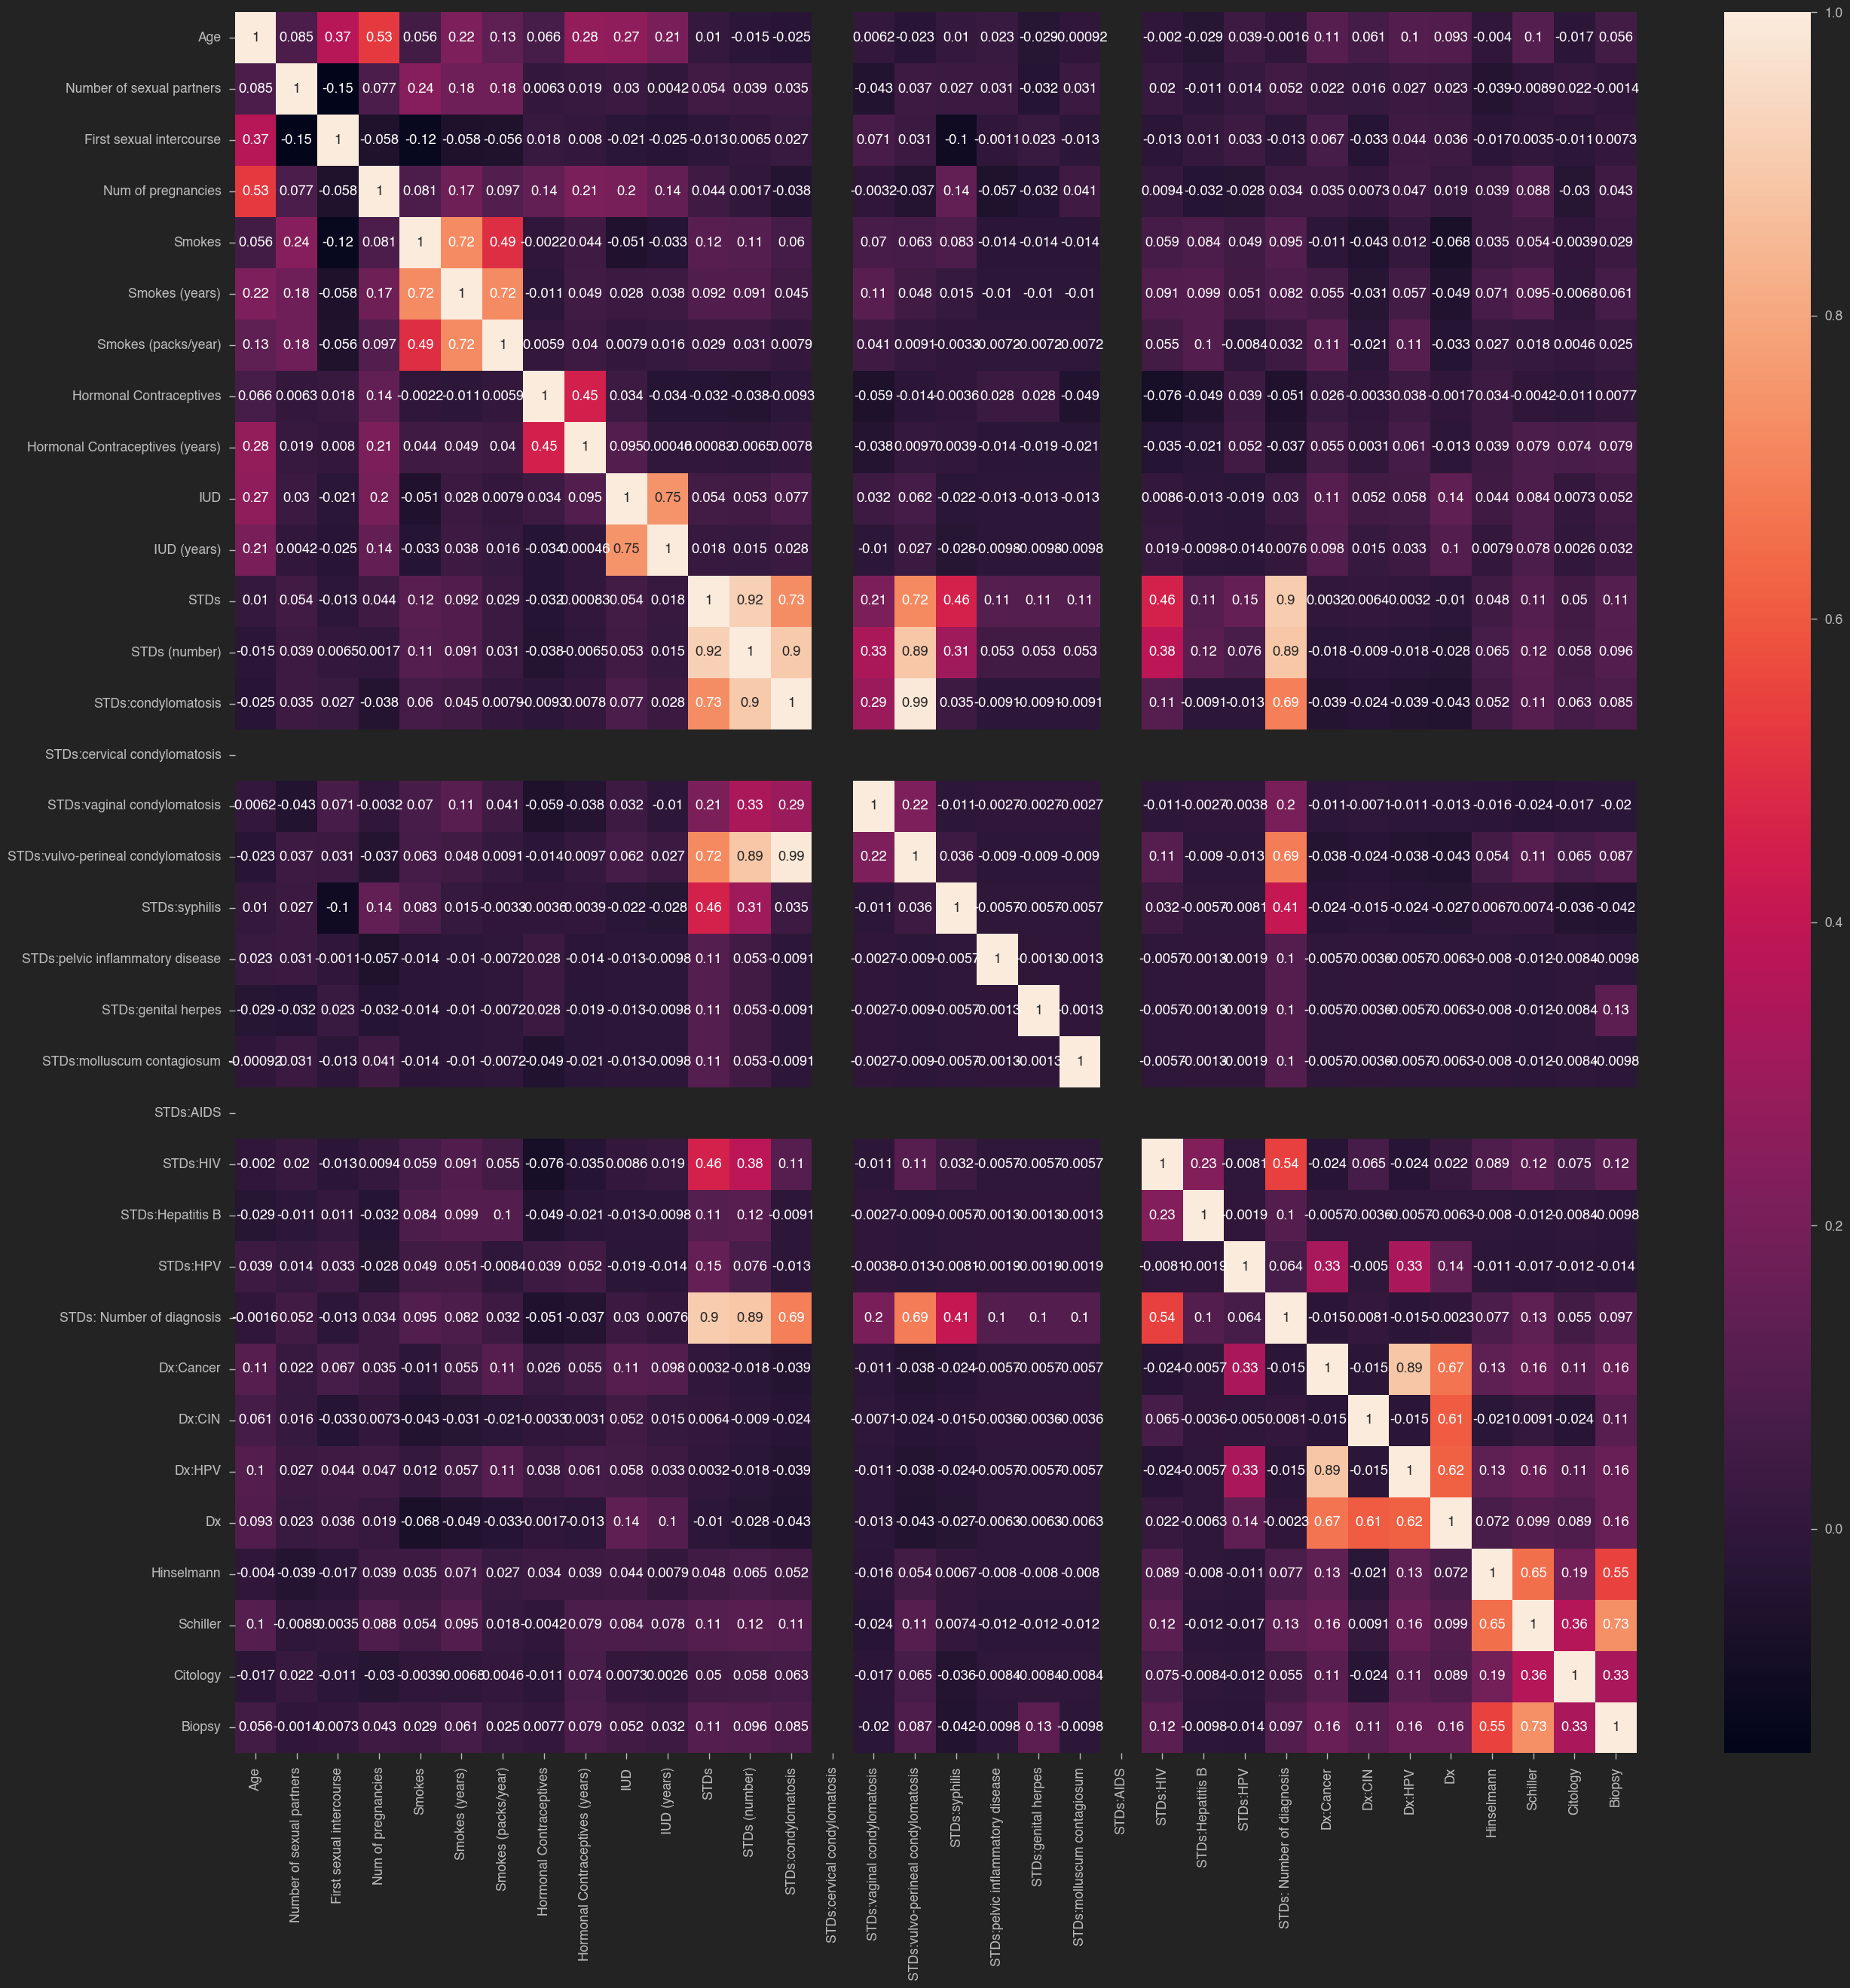

In [13]:
# Plot the correlation matrix
plt.figure(figsize=(30,30))
sns.heatmap(corr_matrix, annot=True)
plt.show()

array([[<Axes: title={'center': 'Age'}>,
        <Axes: title={'center': 'Number of sexual partners'}>,
        <Axes: title={'center': 'First sexual intercourse'}>,
        <Axes: title={'center': 'Num of pregnancies'}>,
        <Axes: title={'center': 'Smokes'}>,
        <Axes: title={'center': 'Smokes (years)'}>],
       [<Axes: title={'center': 'Smokes (packs/year)'}>,
        <Axes: title={'center': 'Hormonal Contraceptives'}>,
        <Axes: title={'center': 'Hormonal Contraceptives (years)'}>,
        <Axes: title={'center': 'IUD'}>,
        <Axes: title={'center': 'IUD (years)'}>,
        <Axes: title={'center': 'STDs'}>],
       [<Axes: title={'center': 'STDs (number)'}>,
        <Axes: title={'center': 'STDs:condylomatosis'}>,
        <Axes: title={'center': 'STDs:cervical condylomatosis'}>,
        <Axes: title={'center': 'STDs:vaginal condylomatosis'}>,
        <Axes: title={'center': 'STDs:vulvo-perineal condylomatosis'}>,
        <Axes: title={'center': 'STDs:syphilis'}>]

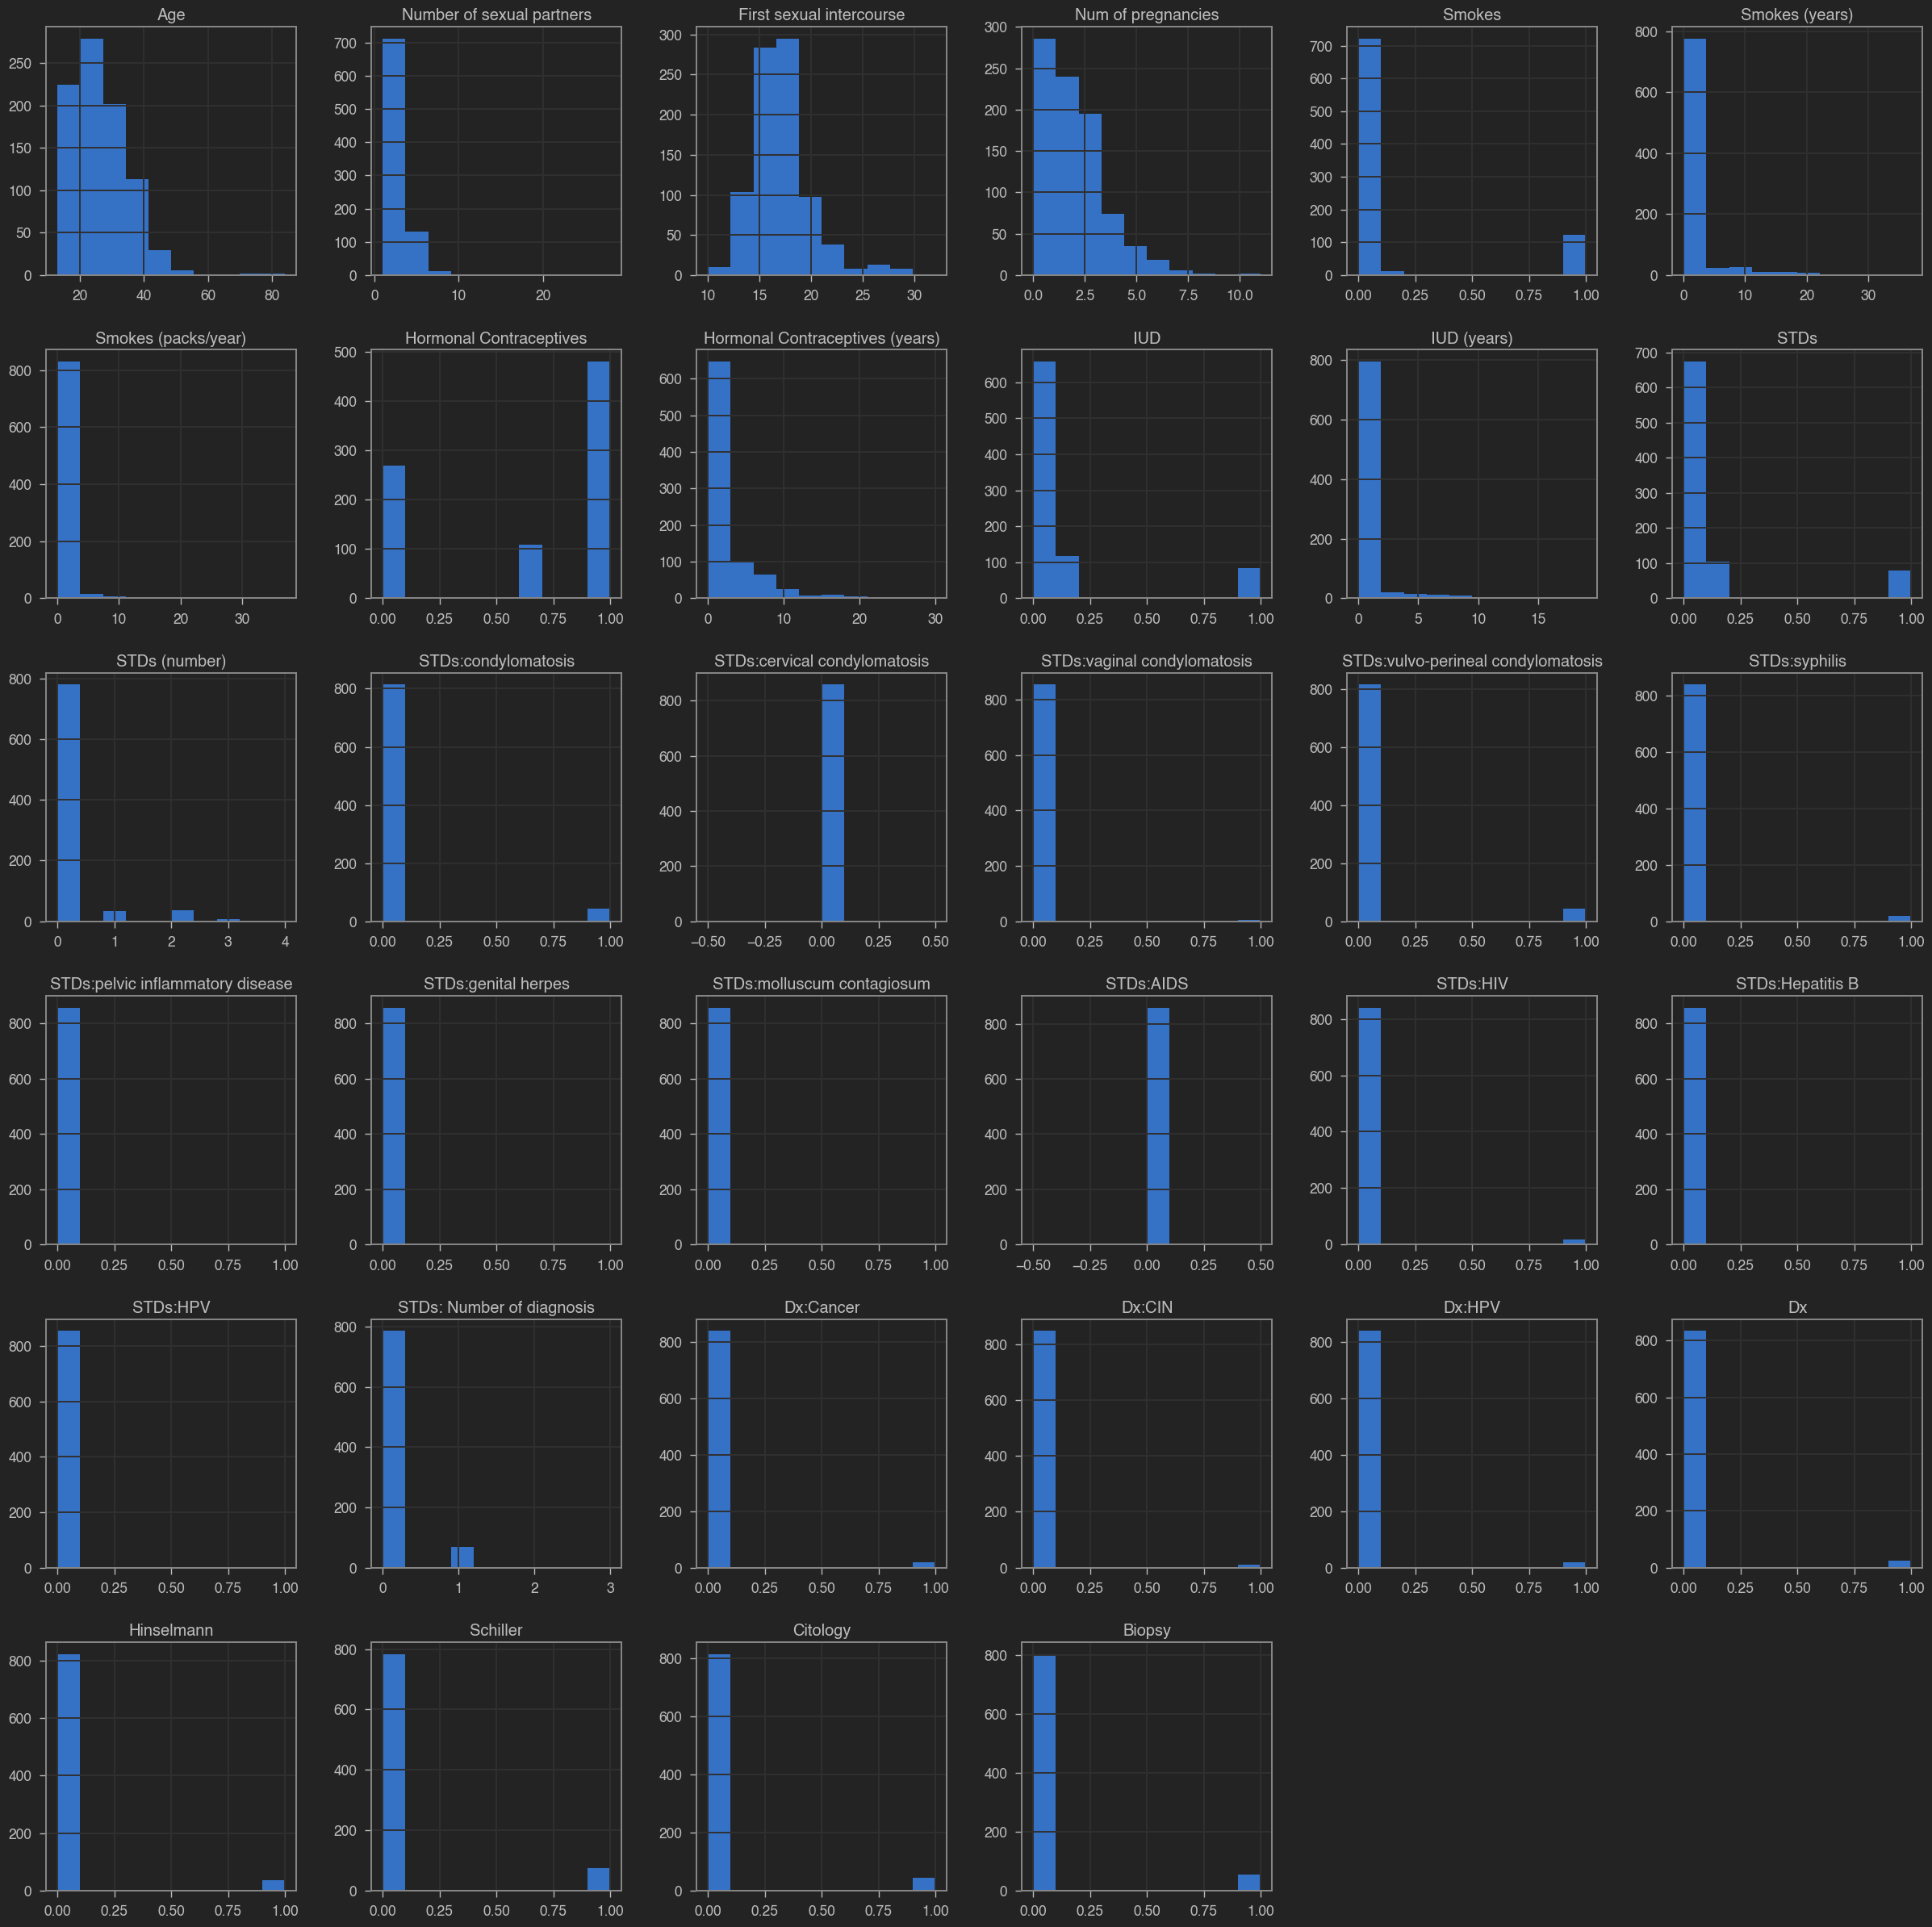

In [14]:
df.hist(bins=10, figsize=(30,30))

# Prepare data for training

In [15]:
target_df = df["Biopsy"]

In [16]:
input_df = df.drop(columns=["Biopsy"])

In [17]:
X = np.array(input_df).astype('float32')
y = np.array(target_df).astype('float32')

### Feature Scaling

In [18]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler
scaler = StandardScaler()
X = scaler.fit_transform(X)

### Data split (train, test, cross validation)

In [24]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
X_test, X_cv, y_test, y_cv = train_test_split(X_test, y_test, test_size=0.5)

# TASK #6: UNDERSTAND THE THEORY AND INTUITION BEHIND XG-BOOST ALGORITHM

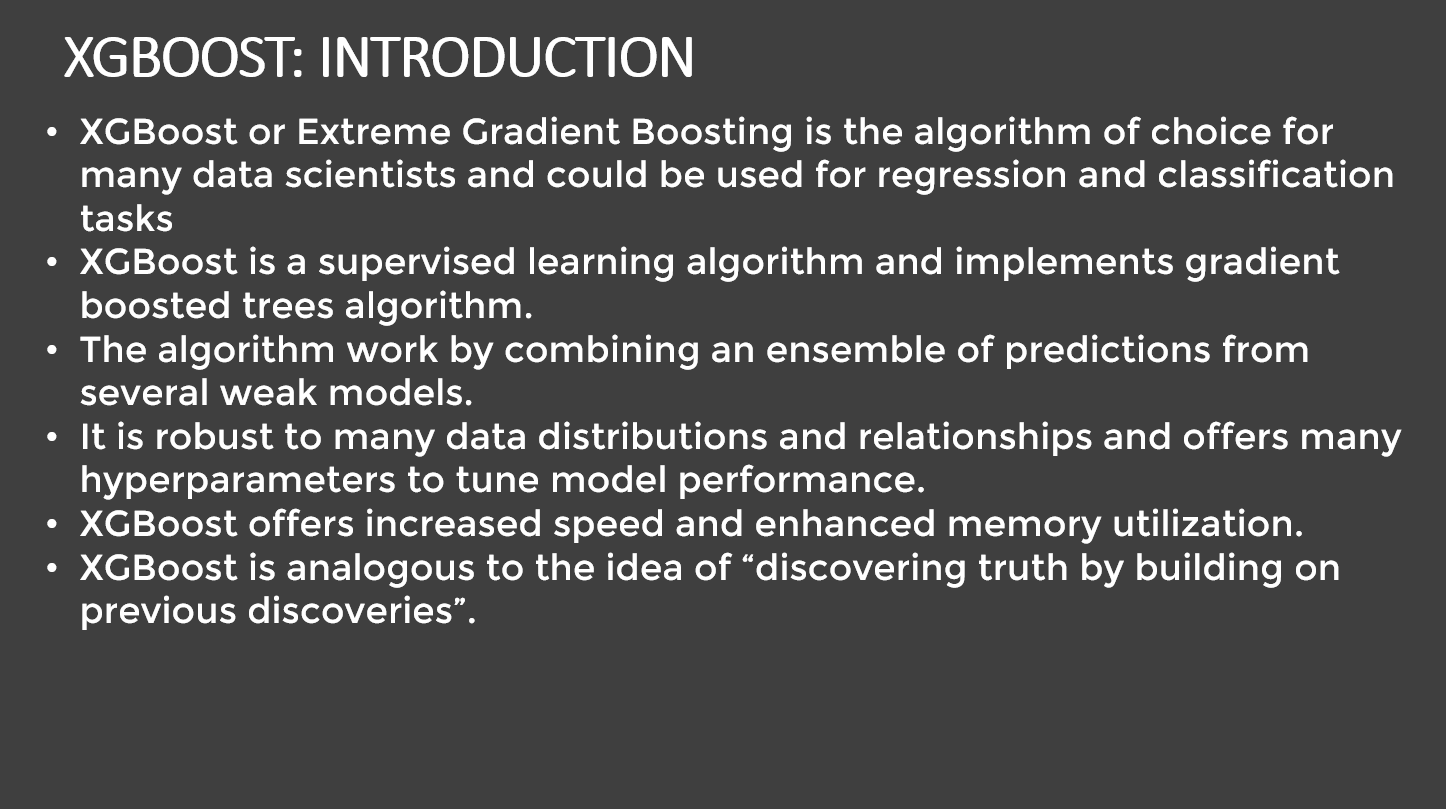

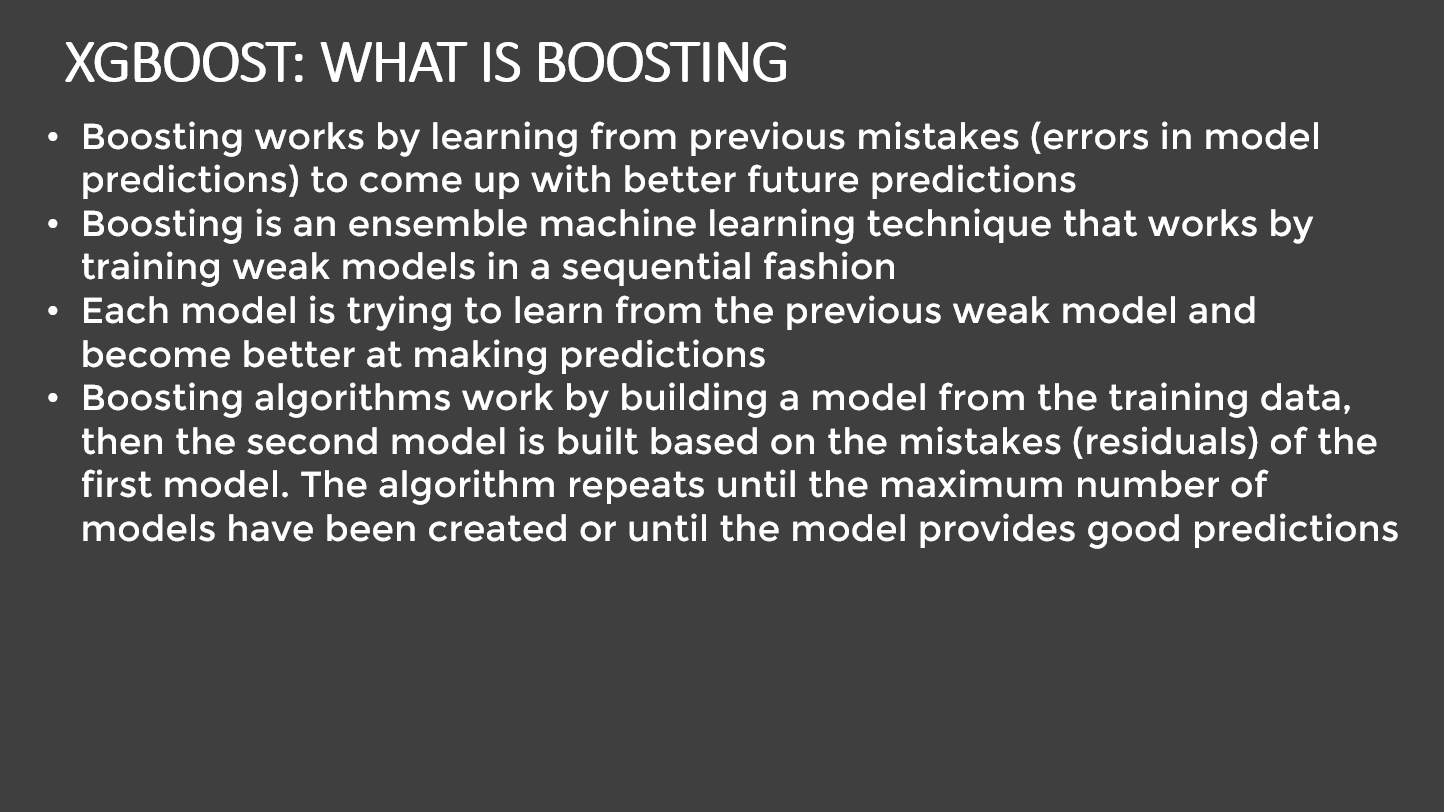

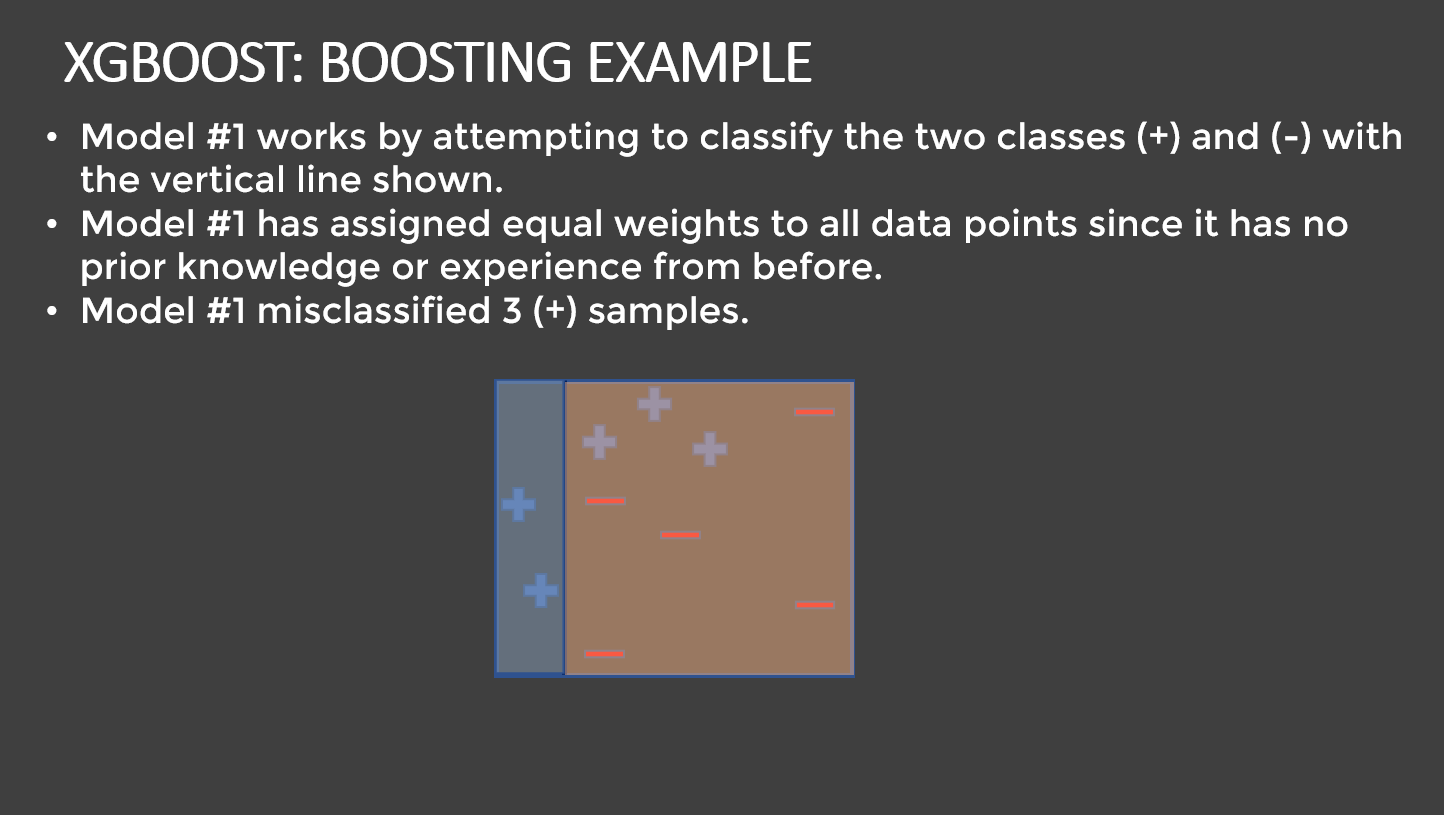

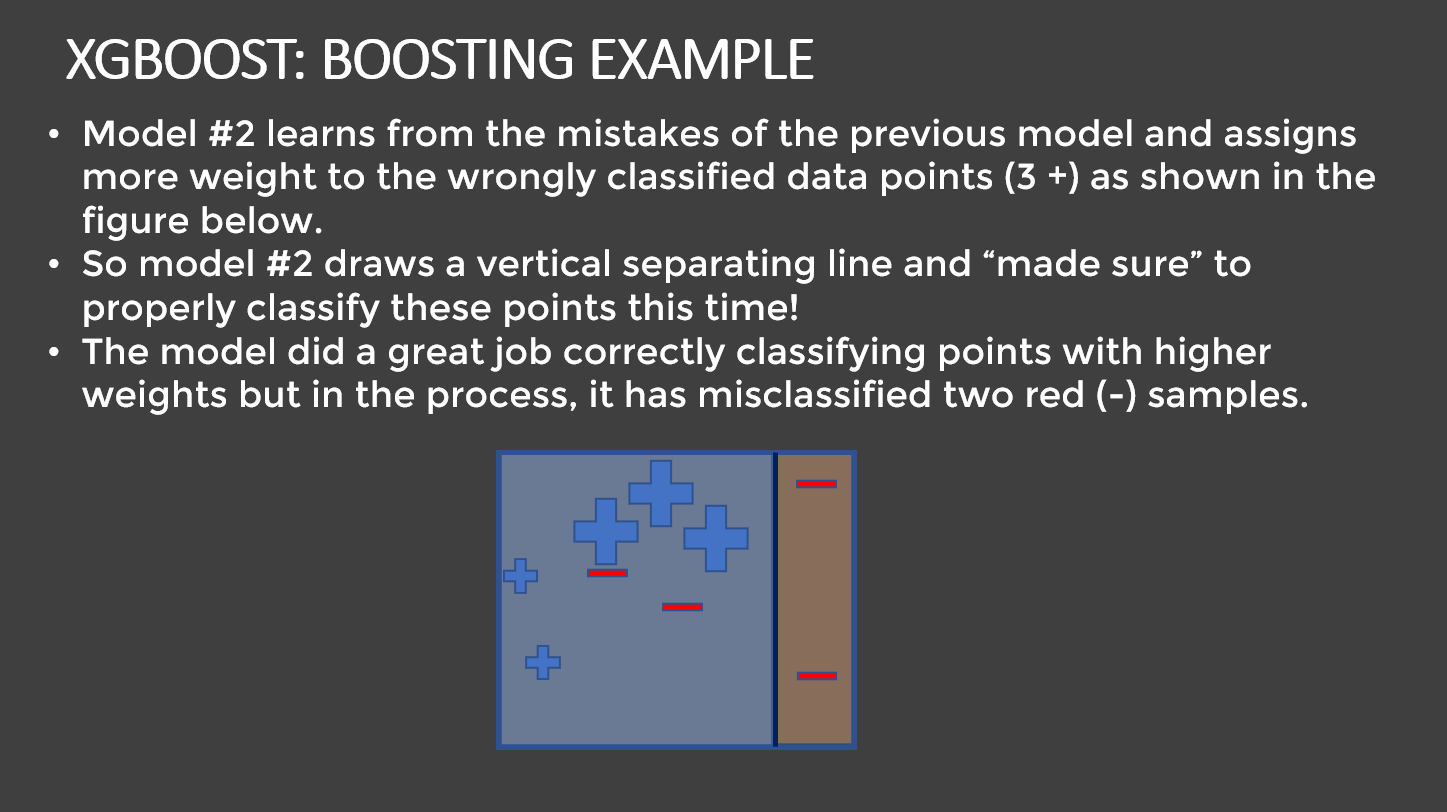

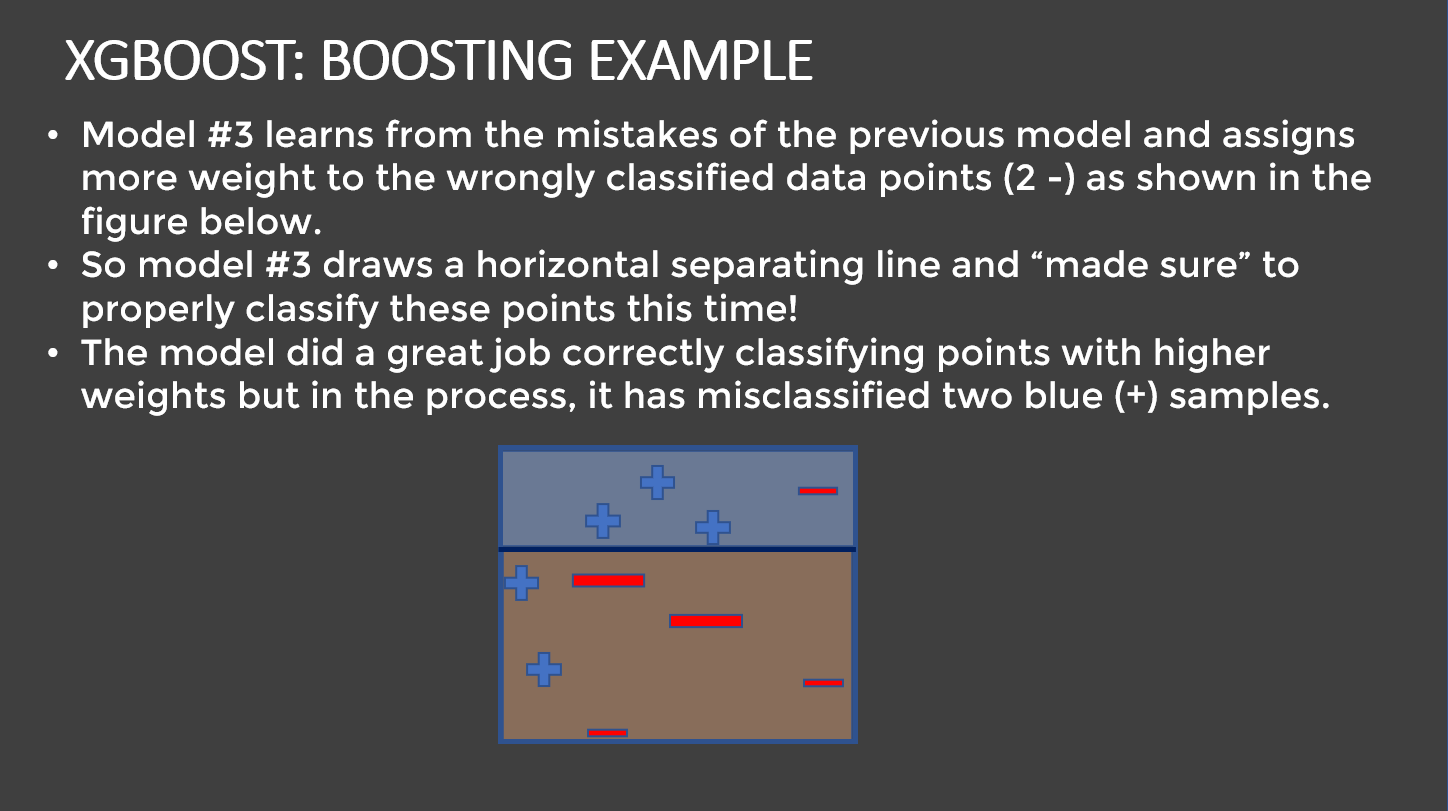

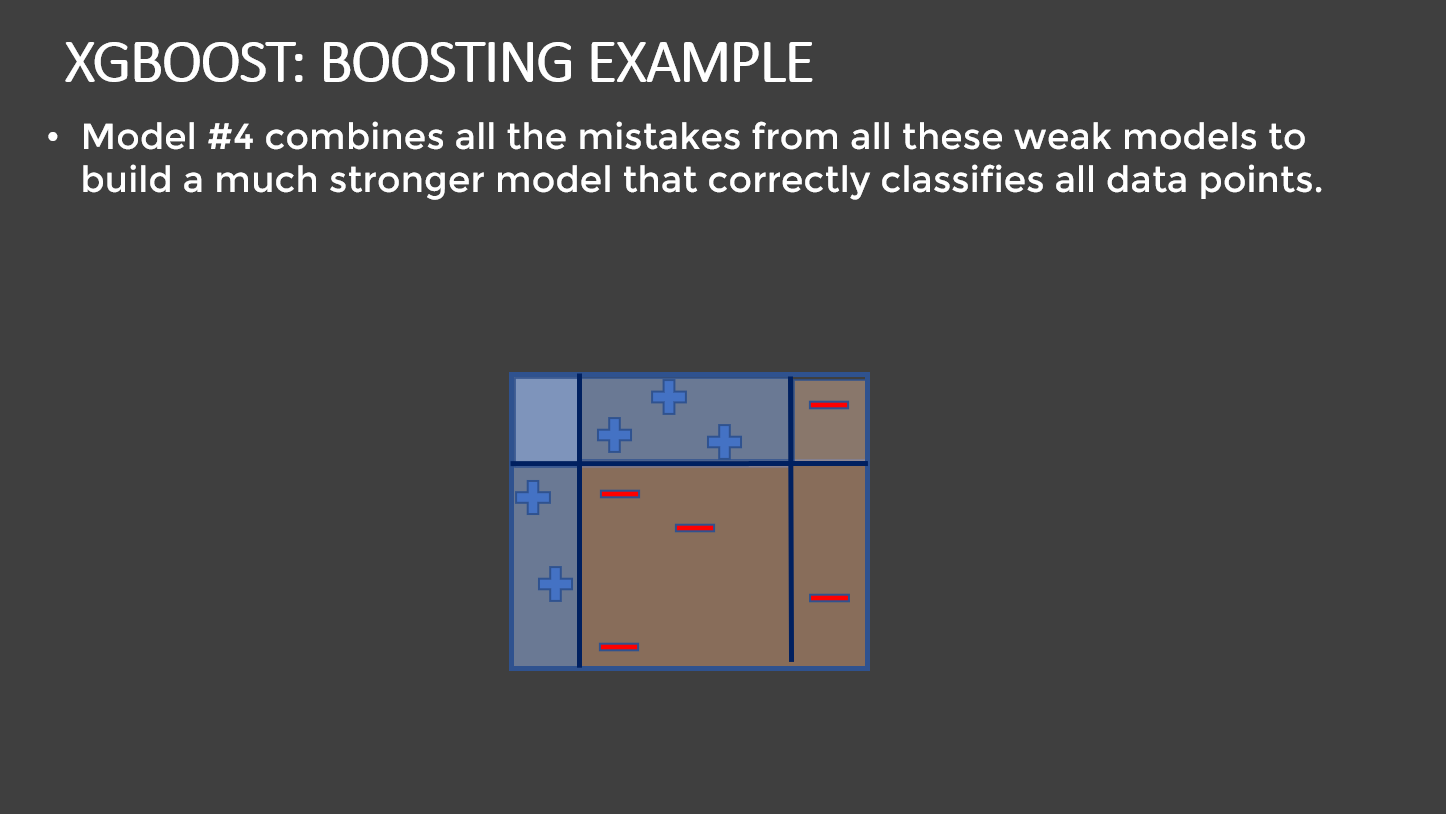

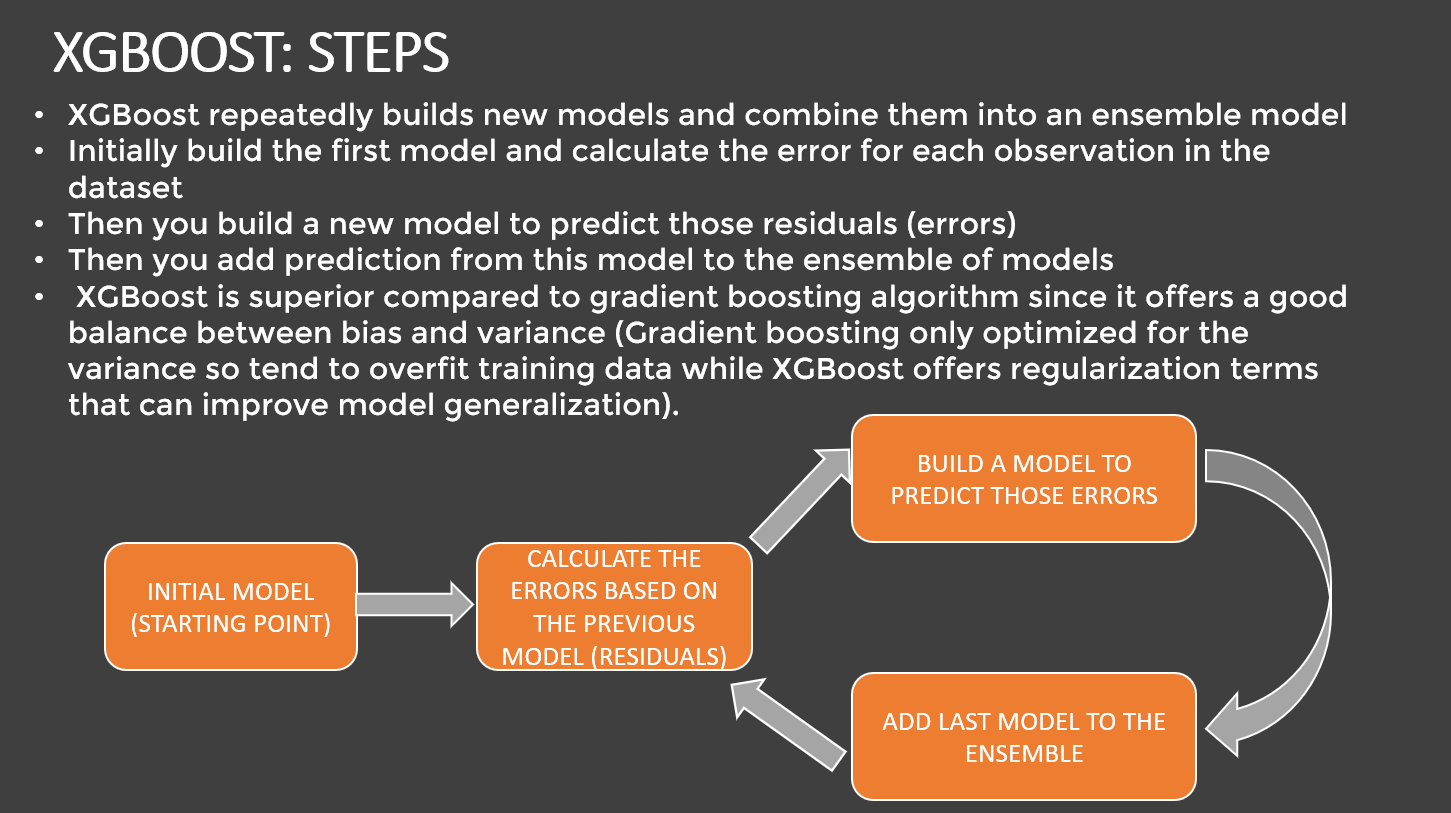

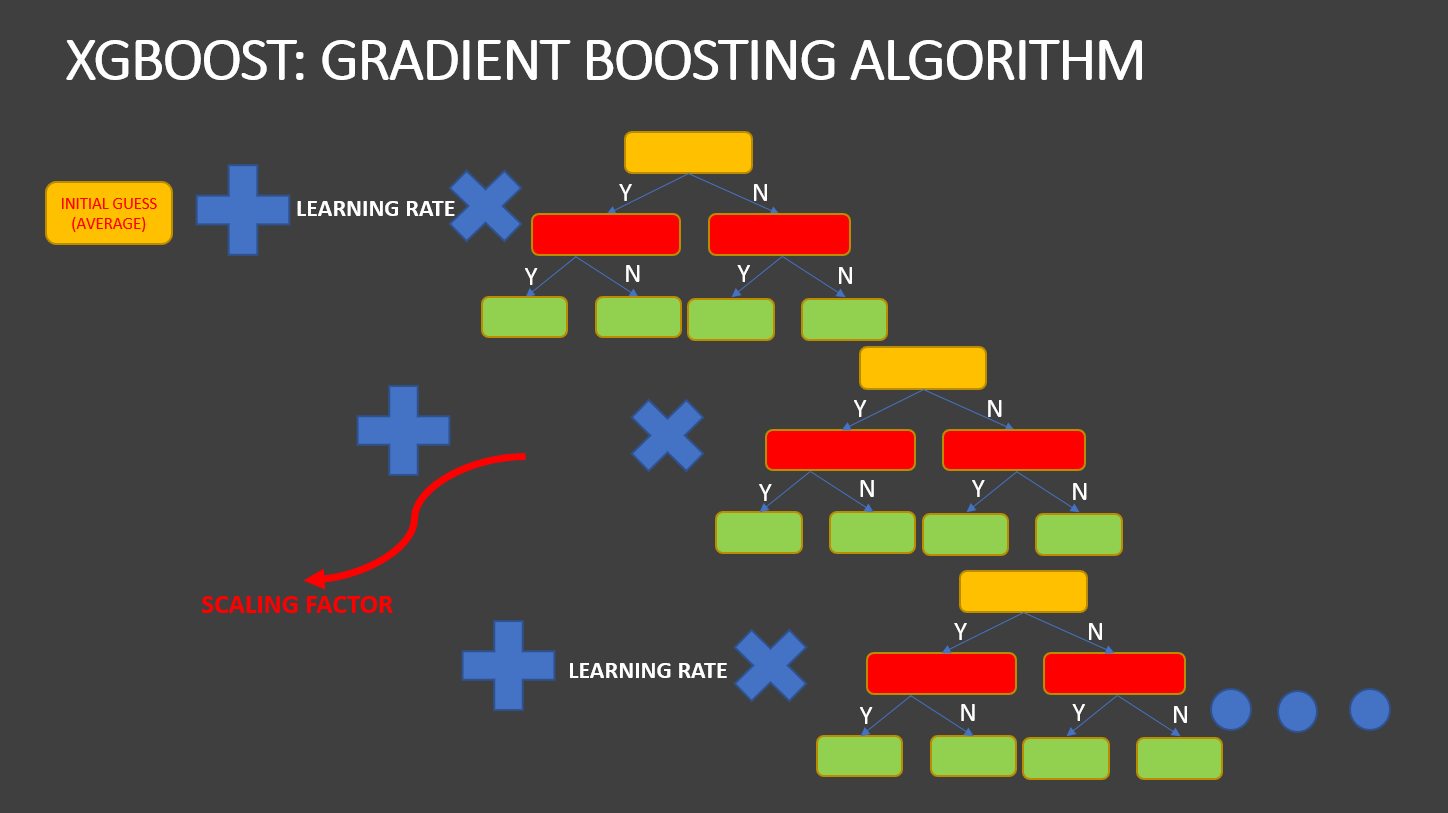

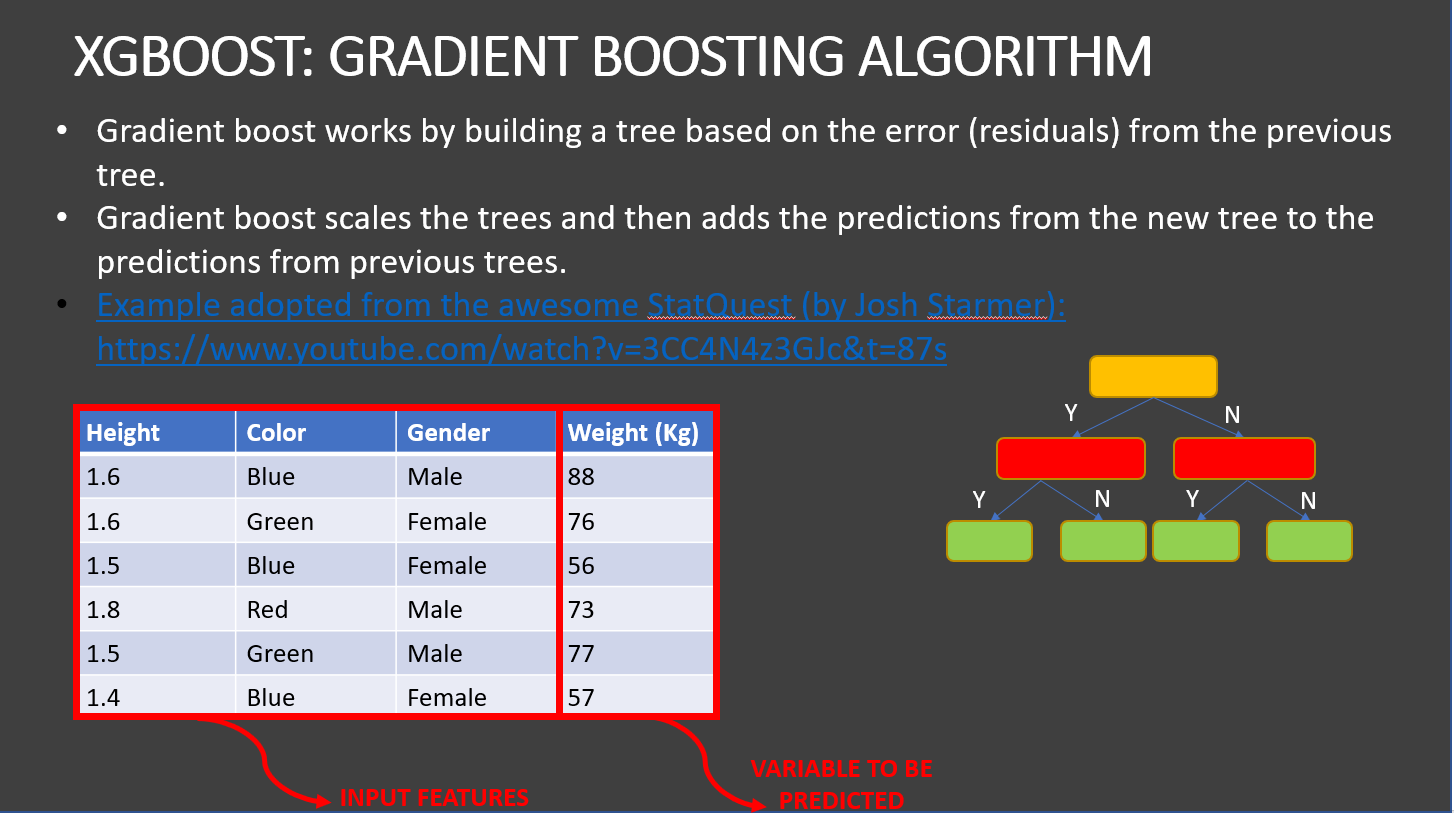

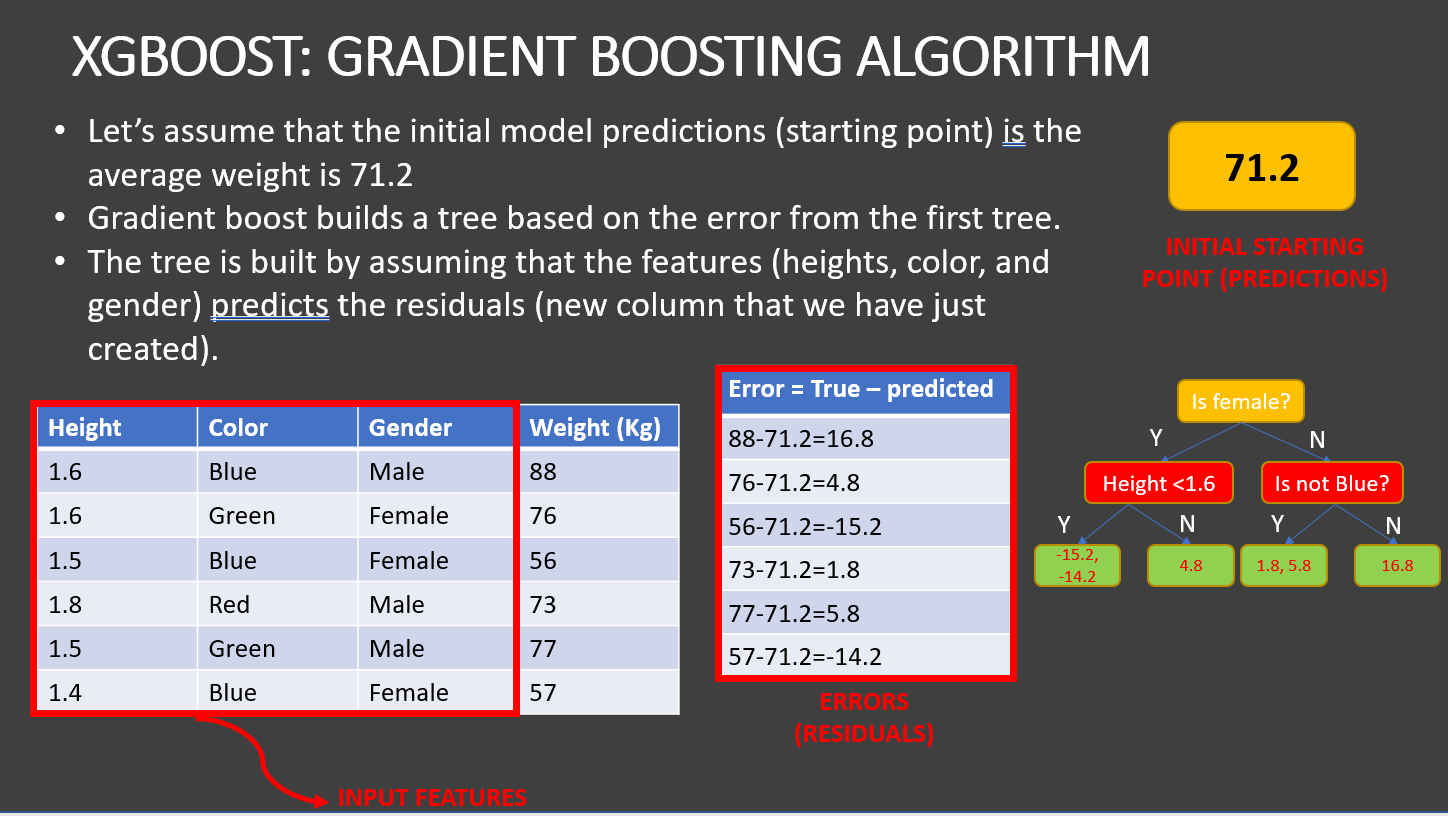

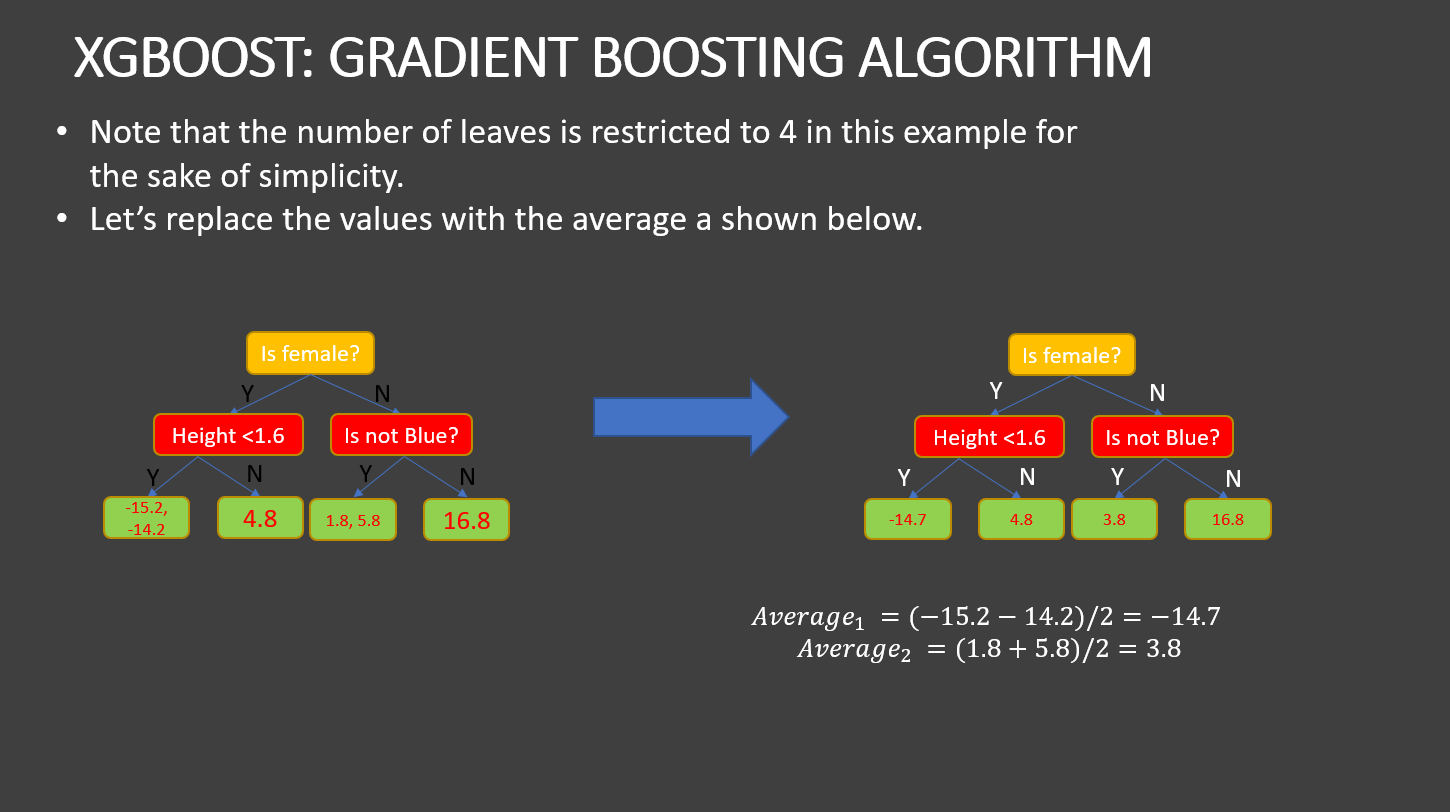

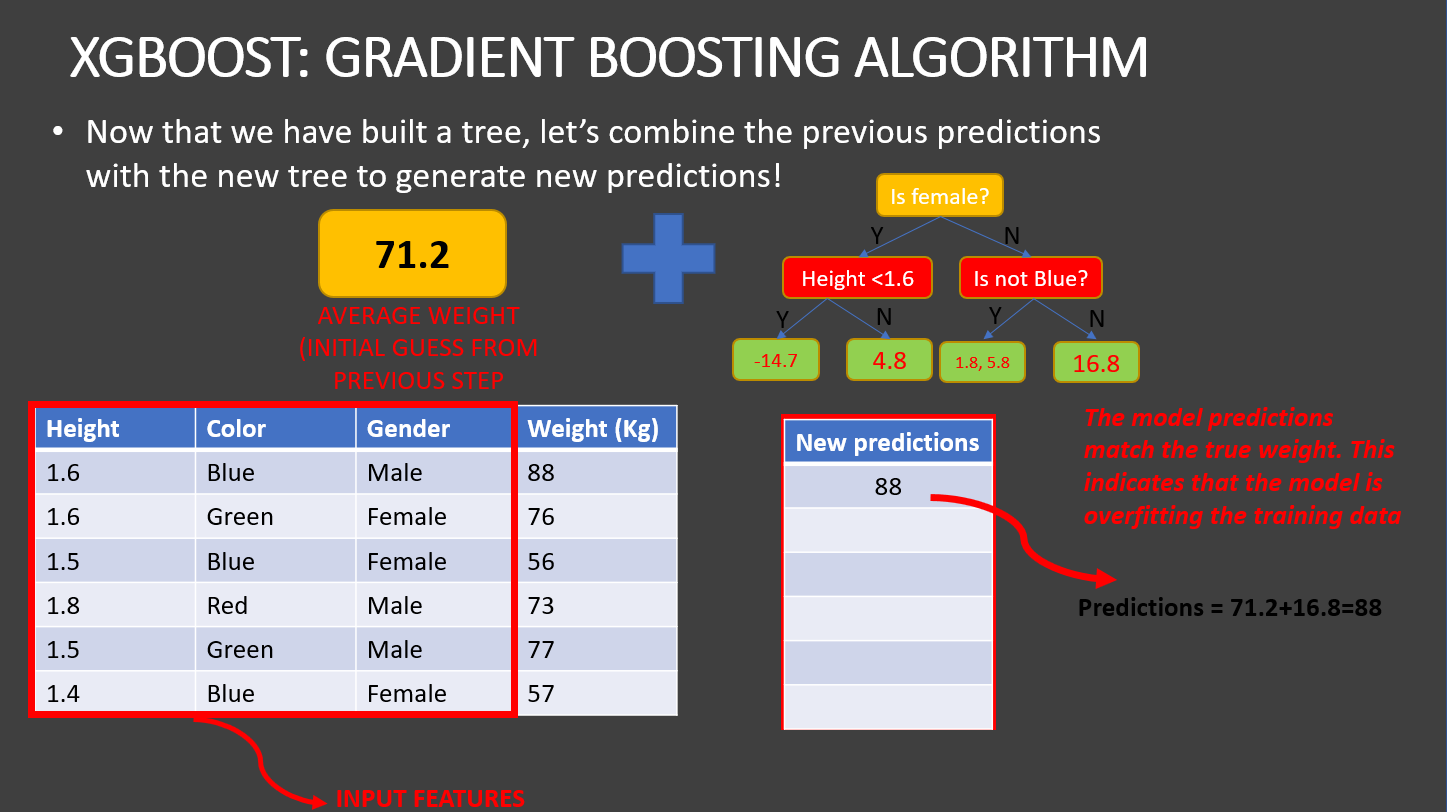

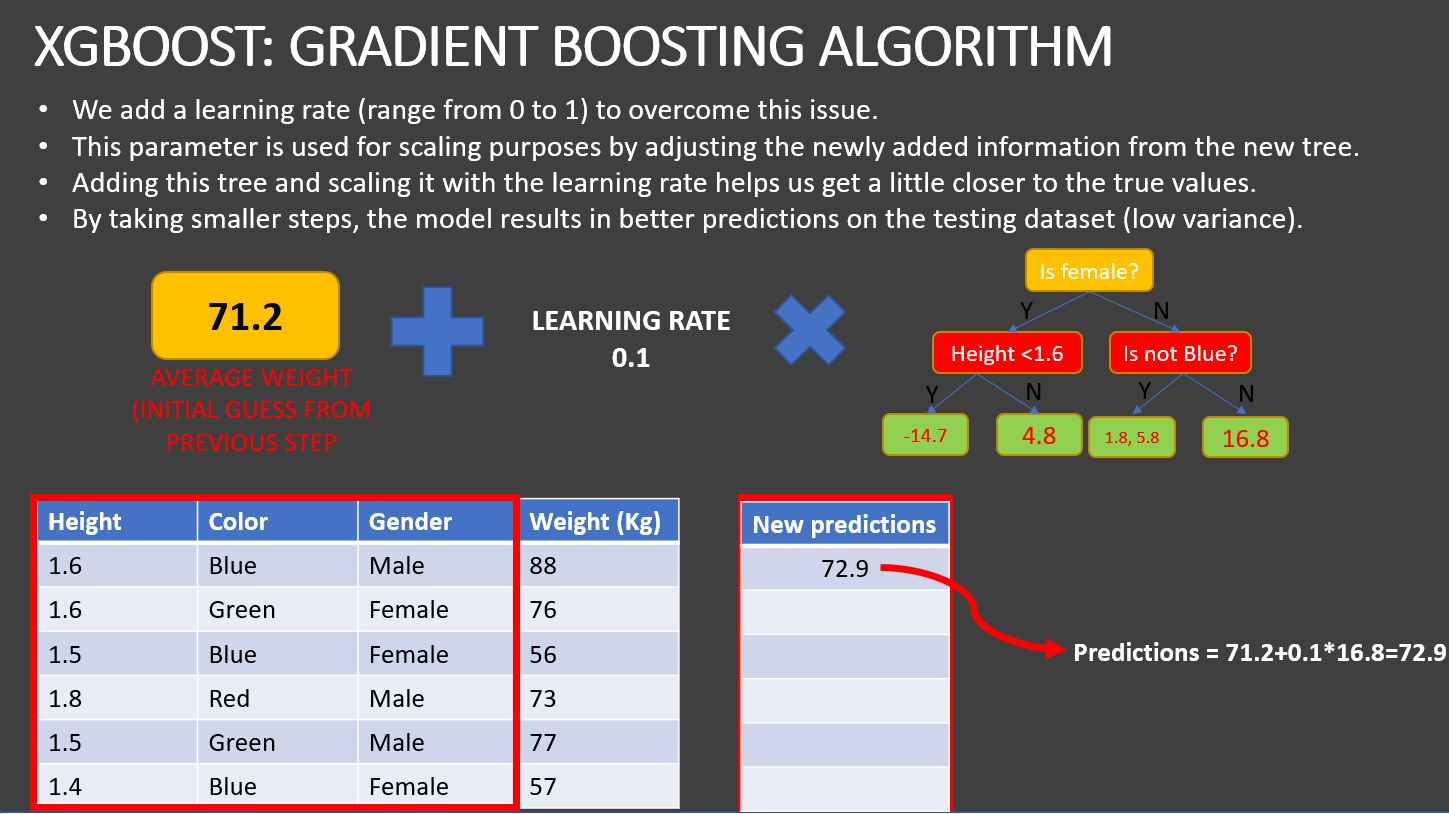

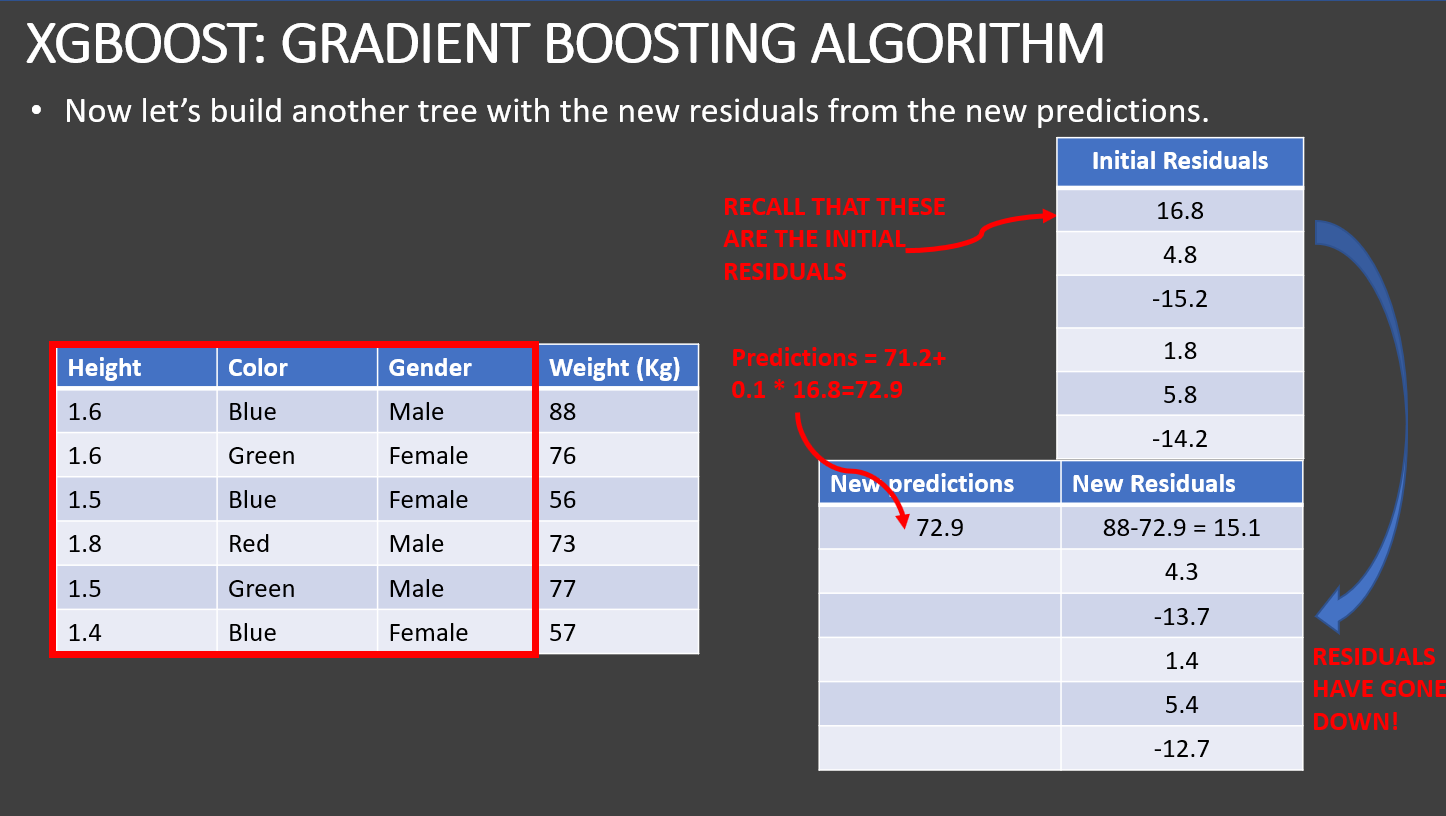

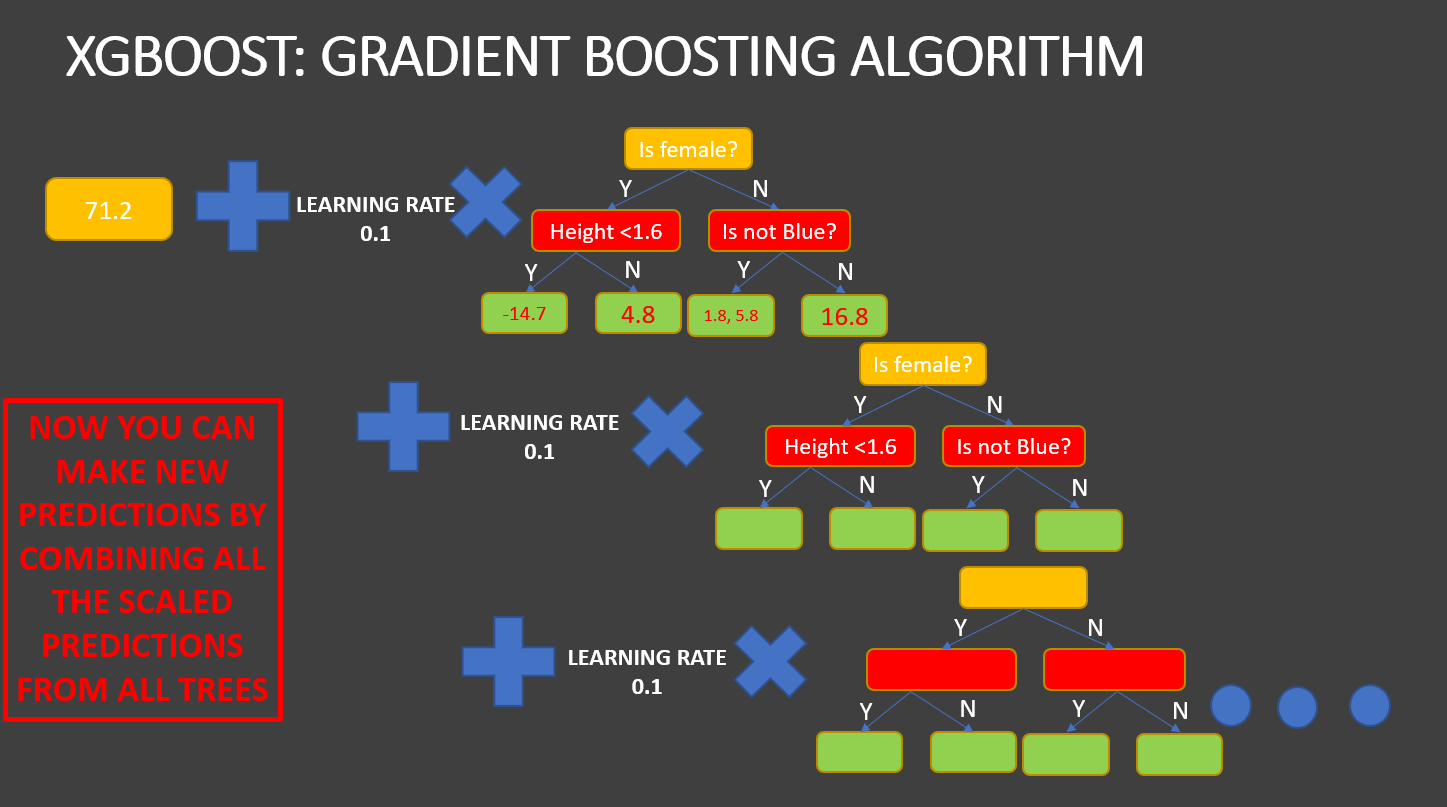

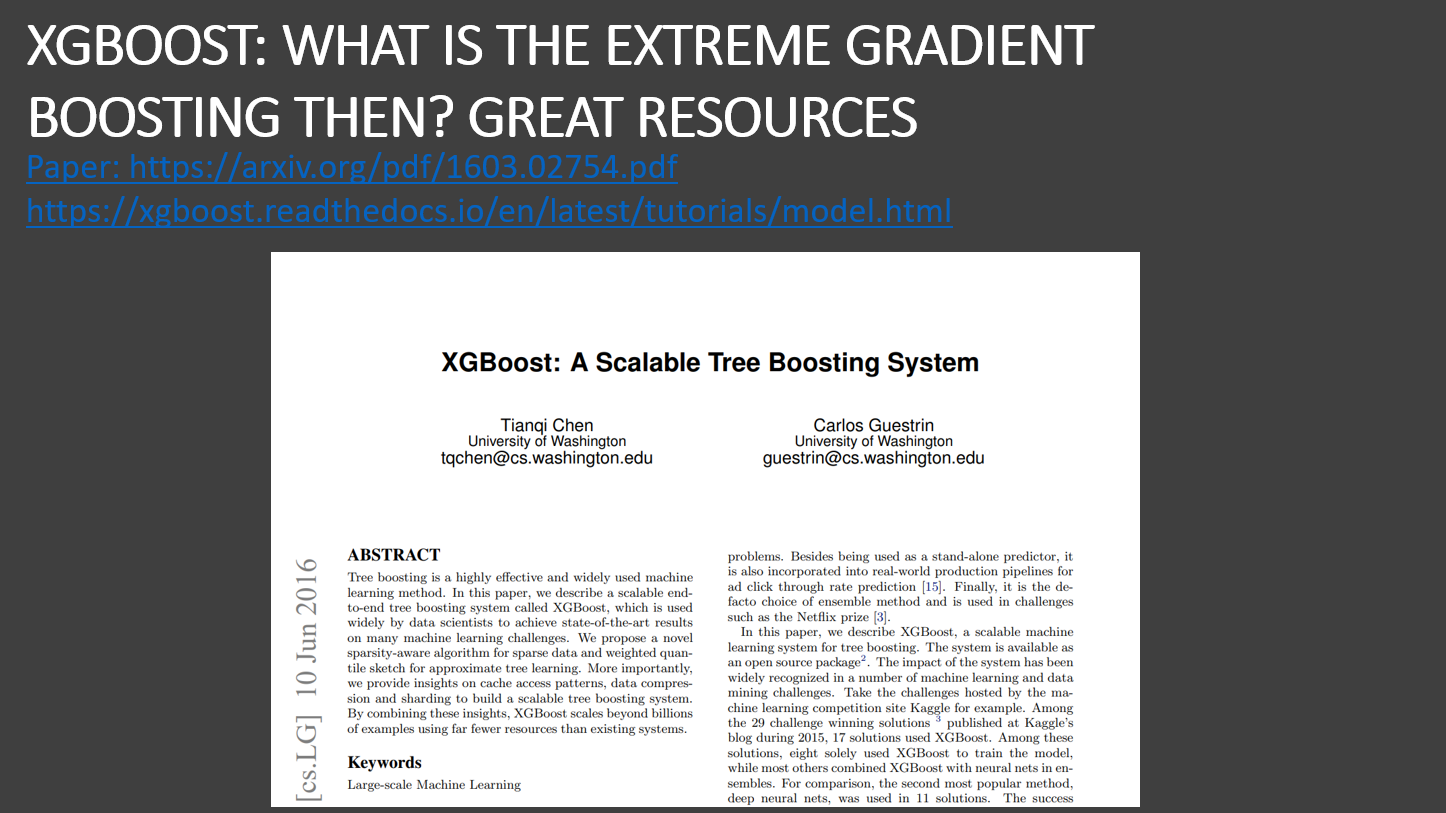

# Train XGBoost classifier

In [21]:
import xgboost as xgb

In [35]:
model = xgb.XGBClassifier(learning_rate=0.1, max_depth=50, n_estimators=100)

In [36]:
model.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=50, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=100, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [37]:
model.score(X_train, y_train)

0.9985422740524781

In [38]:
model.score(X_test, y_test)

0.9534883720930233

In [39]:
y_predicted = model.predict(X_test)

In [40]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_predicted))

              precision    recall  f1-score   support

         0.0       0.96      0.99      0.97        79
         1.0       0.80      0.57      0.67         7

    accuracy                           0.95        86
   macro avg       0.88      0.78      0.82        86
weighted avg       0.95      0.95      0.95        86



Text(0.5, 36.38888888888887, 'Actual class')

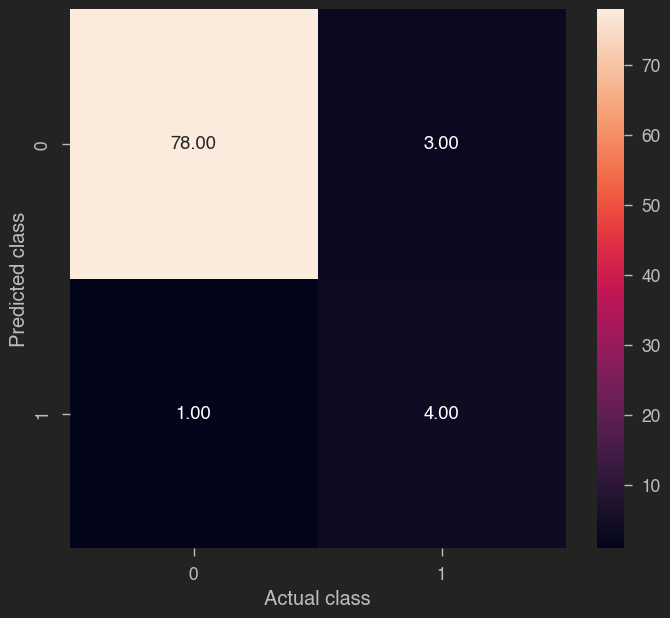

In [42]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_predicted, y_test)
sns.heatmap(cm, annot = True,fmt = '.2f')
plt.ylabel('Predicted class')
plt.xlabel('Actual class')